**Importin Libraries and Packages**

In [1]:

# IMPORTS

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Sklearn Modules
from sklearn.model_selection import train_test_split, RepeatedKFold, StratifiedKFold, GridSearchCV
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_auc_score, roc_curve
)
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# XGBoost
from xgboost import XGBClassifier

# Imbalanced-learn
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN

import warnings
warnings.filterwarnings("ignore")


# **Exploratary Data Analysis :**

In [2]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing the data
df = pd.read_csv("/content/drive/MyDrive/CreditCard/creditcard.csv")

# Showing the content type
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Printing shape of dataset
df.shape

(284807, 31)

In [ ]:
# Checking the datatypes null/non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# Showing statistics of the data
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
# Checking the class distribution for the target variable
df['Class'].value_counts()

,count
Class,
0,284315
1,492


Class
0    99.827251
1     0.172749
Name: Class, dtype: float64


<Axes: ylabel='Class'>

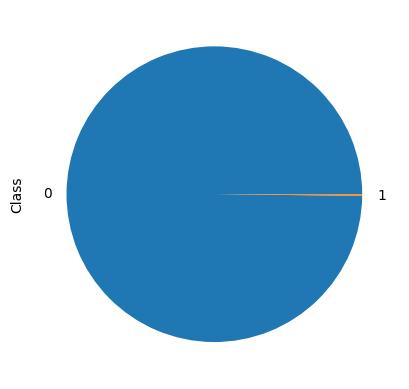

In [ ]:
# Checking the class distribution of the target variable in percentage
print((df.groupby('Class')['Class'].count()/df['Class'].count())*100)
# Pie plot
((df.groupby('Class')['Class'].count()/df['Class'].count())*100).plot.pie()

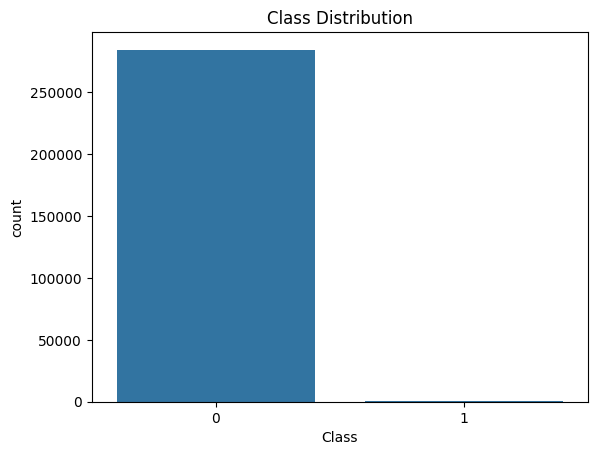

In [ ]:
# Ploting bar chart for class 0 and 1.
sns.countplot(x=df['Class'])
plt.title('Class Distribution')
plt.show()

In [ ]:
# Correlation matrix
corr = df.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


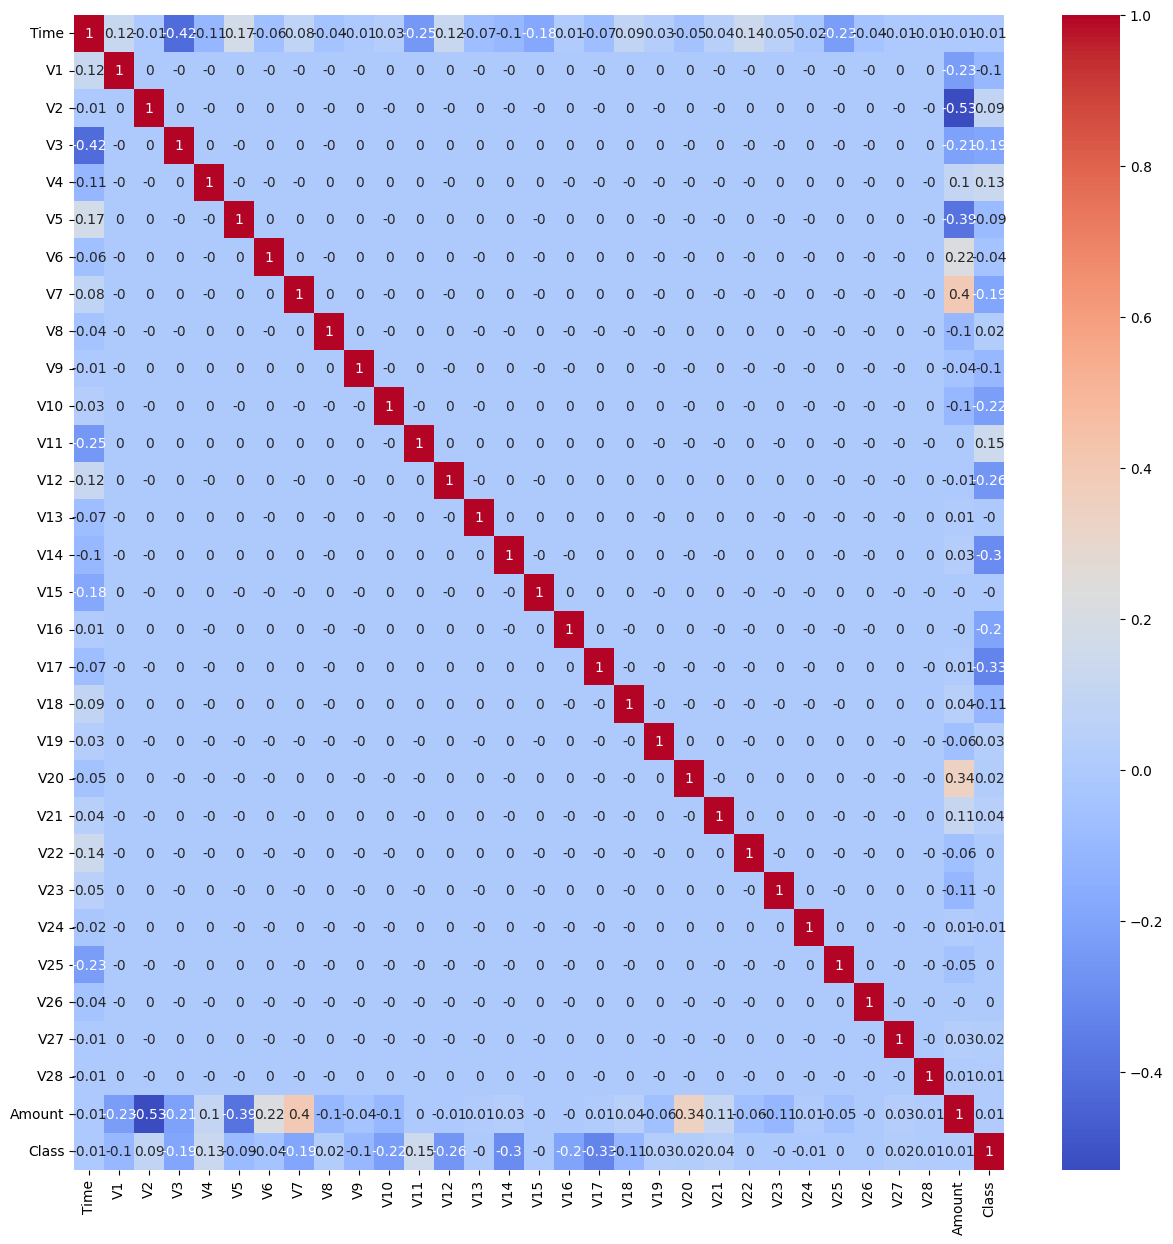

In [ ]:
# Ploting correlation matrix with heatmap
plt.figure(figsize=(15,15))
sns.heatmap(round(corr,2), annot=True, cmap='coolwarm',)
plt.show()

# **Feature Engineering :**

In [4]:
# As time is given in relative fashion, we are using pandas.timedelta which represents a duration,the difference between two time intervals.
Time_Delta = pd.to_timedelta(df['Time'],unit='s')

# Creating Days and Hours Minutes column derived from Time_Delta
# Extracts the number of full days from the Time_Delta column and stores it as an integer in a new 'Days' column
df['Days'] = (Time_Delta.dt.components.days).astype(int)
df['Hours'] =(Time_Delta.dt.components.hours).astype(int)
df['Minutes'] = (Time_Delta.dt.components.minutes).astype(int)


In [5]:
# Droping unnecessary columns
# We will drop Time as we have extracted data from time as Days, Hours and Minutes
df.drop(['Time'],axis=1,inplace=True)
# We will keep only Hours as days and minuts will not be that usefull
df.drop(['Days','Minutes'],axis=1,inplace=True)


# **Splitting data into Train Test sets :**

In [6]:
# Splitting data into x and y
Y = df['Class']
X = df.drop(['Class'],axis=1)

In [ ]:
# Checkin some row of x
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Hours
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Checking some rows of y
Y.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [7]:
# Splitting the dataset using train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,random_state=100,test_size=0.20)

Preserve x_test and y_test to evaluate the test data once you built the model

In [ ]:
# Checking the spread of data post split
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of x_train: (227845, 30)
Shape of x_test: (56962, 30)
Shape of y_train: (227845,)
Shape of y_test: (56962,)


# **Plotting distribution of variables :**

In [ ]:
# Extracting column names
cols = list(X.columns.values)
print(cols)

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Hours']


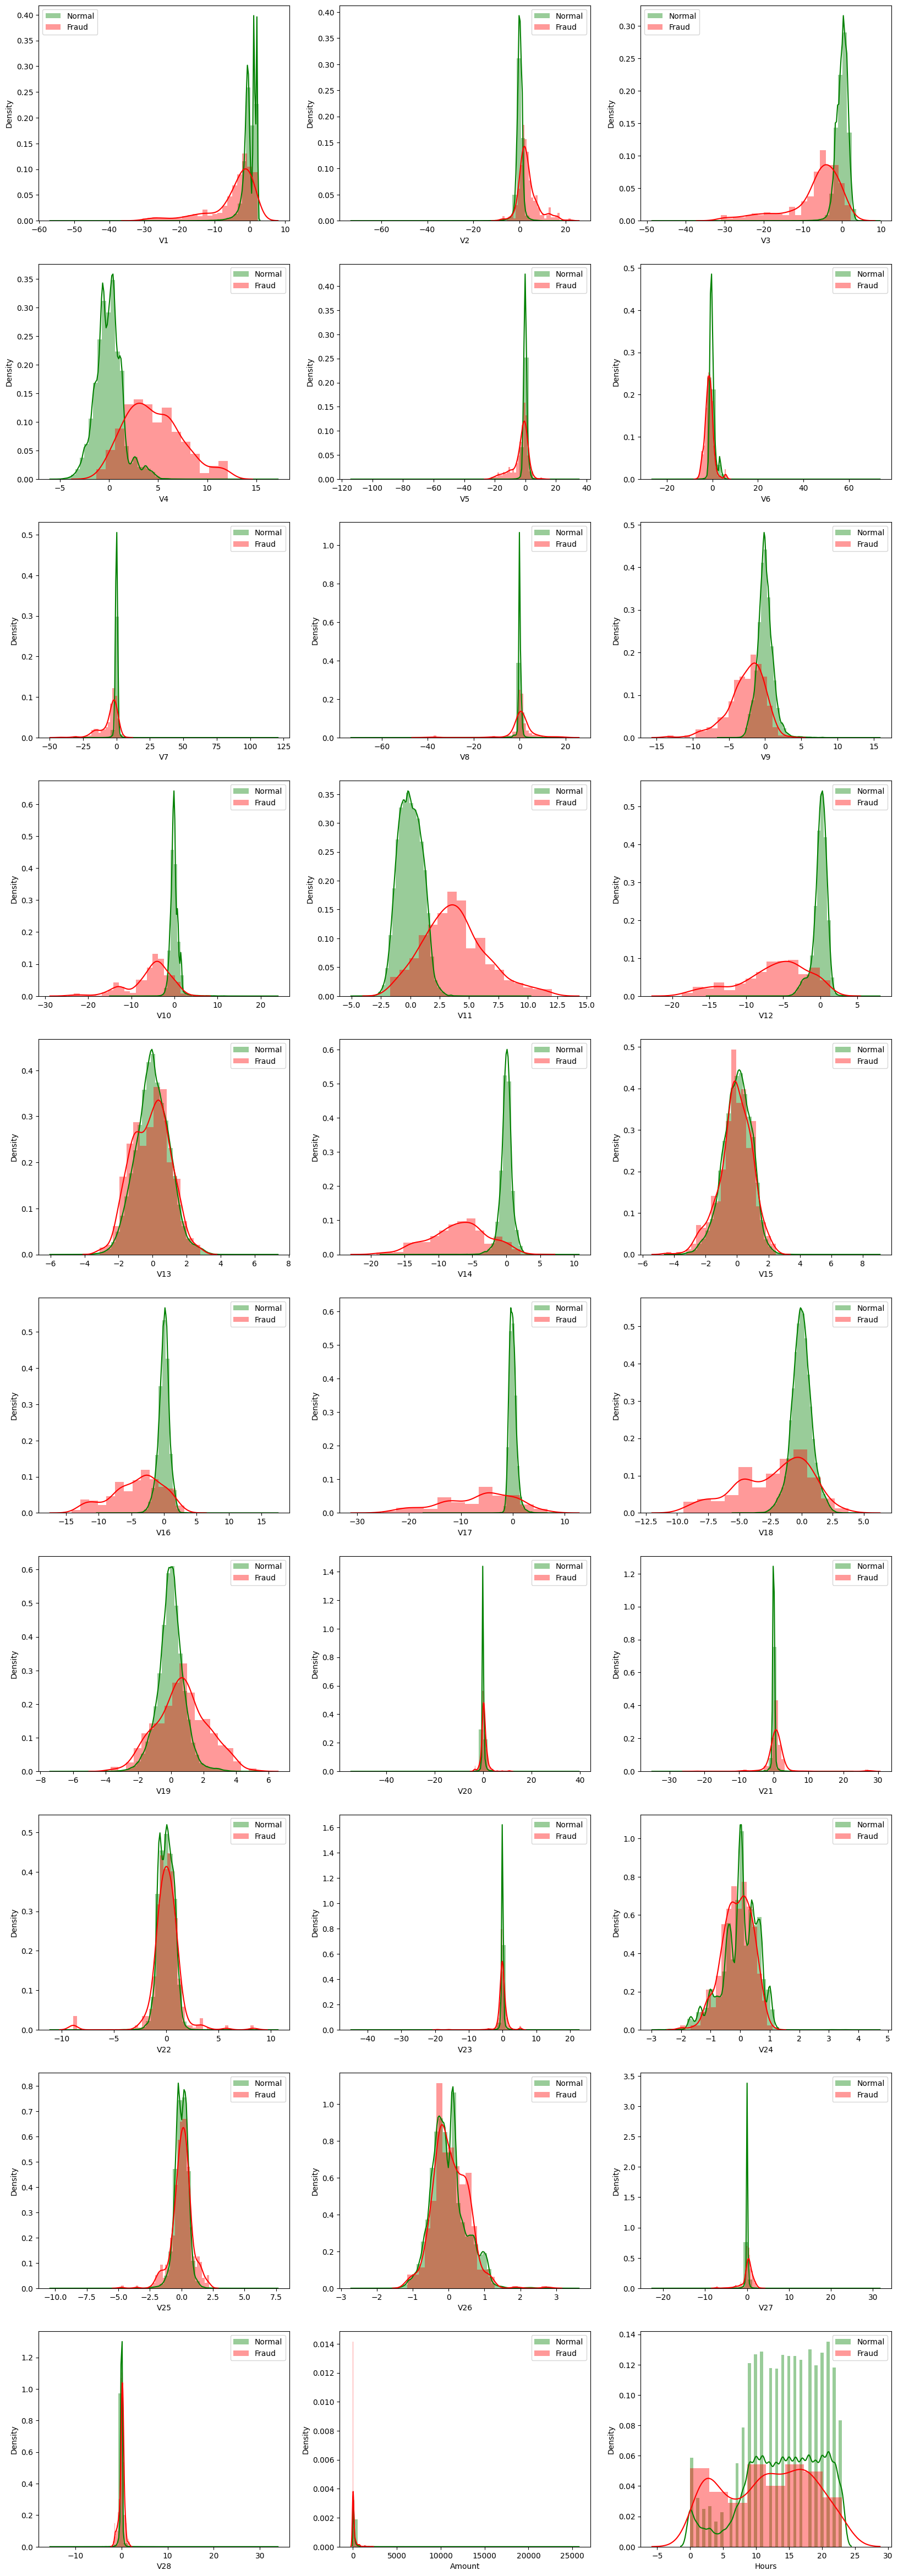

In [ ]:
# Plotting the histogram of variables to see the skewness
normal_records = df.Class == 0
fraud_records = df.Class == 1

plt.figure(figsize=(20,60))
for n, col in enumerate(cols):
  plt.subplot(10,3,n+1)
  sns.distplot(X[col][normal_records], label='Normal',color='g')
  sns.distplot(X[col][fraud_records], label='Fraud',color='r')
  plt.legend()
plt.show()

# **Model Building :**

In [8]:
# Creatting dataframe to store the results from different models
df_results = pd.DataFrame(columns=['Methodology','Model','Accuracy','roc_values','threshold'])

In [9]:
# Function for plotting a confusion matrix with good visuals
def plot_confusion_matrix(y_test, pred_test,title):
    cm = confusion_matrix(y_test, pred_test)
    plt.clf()

    plt.figure(figsize=(4, 4))
    plt.imshow(cm, interpolation='none', cmap=plt.cm.Wistia)

    classNames = ['Normal', 'Fraud']
    plt.title(title, fontdict=dict(size=15))
    plt.ylabel('Actual label', fontdict=dict(size=15))
    plt.xlabel('Predicted label', fontdict=dict(size=15))

    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)

    # Add grid lines between cells
    ax = plt.gca()
    ax.set_xticks(np.arange(-0.5, 2, 1), minor=True)
    ax.set_yticks(np.arange(-0.5, 2, 1), minor=True)
    ax.grid(which='minor', color='black', linestyle='-', linewidth=1)
    ax.tick_params(which='minor', bottom=False, left=False)

    # Annotate cell values with TP/TN/FP/FN
    labels = [['TN', 'FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j, i, f"{labels[i][j]} = {cm[i][j]}", ha='center', va='center')

    plt.tight_layout()
    plt.show()


**MODEL-1.**{Logistic Regression}

In [10]:
# Creating a common method to fit and predict Logistic Regression model
def builtAndRunLogisticRegressionModels(df_results, Methodology, x_train, y_train, x_test, y_test):
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    from sklearn.linear_model import LogisticRegressionCV
    from sklearn.model_selection import KFold
    from sklearn.metrics import (
        accuracy_score, classification_report, confusion_matrix,
        roc_auc_score, roc_curve, auc
    )

    # Hyperparameters
    num_C = list(np.power(10.0, np.arange(-10, 10)))
    cv_num = KFold(n_splits=10, shuffle=True, random_state=42)

    # L2 Logistic Regression
    searchCV_L2 = LogisticRegressionCV(
        Cs=num_C, penalty='l2', scoring='roc_auc', cv=cv_num,
        random_state=42, max_iter=10000, fit_intercept=True,
        solver='newton-cg', tol=10
    )

    # L1 Logistic Regression
    searchCV_L1 = LogisticRegressionCV(
        Cs=num_C, penalty='l1', scoring='roc_auc', cv=cv_num,
        random_state=42, max_iter=10000, fit_intercept=True,
        solver='liblinear', tol=10
    )

    # Fit both models
    searchCV_L2.fit(x_train, y_train)
    searchCV_L1.fit(x_train, y_train)

    # Extract class label key for .scores_
    class_label = list(searchCV_L1.scores_.keys())[0]

    print('Max AUC ROC for L1:', searchCV_L1.scores_[class_label].mean(axis=0).max())
    print('Max AUC ROC for L2:', searchCV_L2.scores_[class_label].mean(axis=0).max())

    print('Parameters for L1 regularisation:')
    print('Coefficients:', searchCV_L1.coef_)
    print('Intercept:', searchCV_L1.intercept_)

    print('Parameters for L2 regularisation:')
    print('Coefficients:', searchCV_L2.coef_)
    print('Intercept:', searchCV_L2.intercept_)

    # Predictions
    y_pred_l1 = searchCV_L1.predict(x_test)
    y_pred_l2 = searchCV_L2.predict(x_test)

    y_pred_proba_l1 = searchCV_L1.predict_proba(x_test)[:, 1]
    y_pred_proba_l2 = searchCV_L2.predict_proba(x_test)[:, 1]

    # Accuracy and Classification Report
    Accuracy_l1 = accuracy_score(y_test, y_pred_l1)
    Accuracy_l2 = accuracy_score(y_test, y_pred_l2)

    print('Accuracy for L1:', Accuracy_l1)
    print('Confusion Matrix for L1:-')
    plot_confusion_matrix(y_test, y_pred_l1,"CM for LR with L1")
    print(classification_report(y_test, y_pred_l1))

    print('Accuracy for L2:', Accuracy_l2)
    print('Confusion Matrix for L2:-')
    plot_confusion_matrix(y_test, y_pred_l2,"CM for LR with L2")
    print(classification_report(y_test, y_pred_l2))

    # ROC and AUC for L1
    l1_roc_values = roc_auc_score(y_test, y_pred_proba_l1)
    fpr, tpr, threshold = roc_curve(y_test, y_pred_proba_l1)
    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = threshold[optimal_idx]

    print("L1 ROC AUC Score:", l1_roc_values)
    print("Optimal Threshold (L1):", optimal_threshold)

    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color='red', label="L1 Test, AUC = {:.2f}".format(roc_auc))
    plt.legend(loc=4)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - L1')
    plt.show()

    df_l1 = pd.DataFrame({
        "Methodology": [Methodology],
        "Model": ["Logistic Regression with L1 regularisation"],
        "Accuracy": [Accuracy_l1],
        "roc_values": [l1_roc_values],
        "threshold": [optimal_threshold]
    })

    df_results = pd.concat([df_l1, df_results], ignore_index=True)

    # ROC and AUC for L2
    l2_roc_values = roc_auc_score(y_test, y_pred_proba_l2)
    fpr, tpr, threshold = roc_curve(y_test, y_pred_proba_l2)
    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = threshold[optimal_idx]

    print("L2 ROC AUC Score:", l2_roc_values)
    print("Optimal Threshold (L2):", optimal_threshold)

    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color='blue', label="L2 Test, AUC = {:.2f}".format(roc_auc))
    plt.legend(loc=4)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - L2')
    plt.show()

    df_l2 = pd.DataFrame({
        "Methodology": [Methodology],
        "Model": ["Logistic Regression with L2 regularisation"],
        "Accuracy": [Accuracy_l2],
        "roc_values": [l2_roc_values],
        "threshold": [optimal_threshold]
    })

    df_results = pd.concat([df_l2, df_results], ignore_index=True)

    return df_results


**MODEL-2.**{KNN Model}

In [11]:
# Creating a common function to fit and predict on a KNN model
def builtAndRunKNNModels(df_results, Methodology, x_train, y_train, x_test, y_test):

  from sklearn.neighbors import KNeighborsClassifier
  from sklearn.metrics import accuracy_score
  from sklearn.metrics import classification_report
  from sklearn import metrics

  # Create KNN model and fit the model with train dataset
  knn = KNeighborsClassifier(n_neighbors=5,n_jobs=16)
  knn.fit(x_train, y_train)
  score = knn.score(x_test, y_test)
  print("KNN Model Score:-")
  print(score)

  # Accuracy
  y_pred = knn.predict(x_test)
  KNN_Accuracy = accuracy_score(y_test, y_pred)
  print("Confusion matrix for KNN:-")
  plot_confusion_matrix(y_test, y_pred,"CM for KNN")
  print("Classification Report for KNN:-")
  print(classification_report(y_test, y_pred))

  knn_probs = knn.predict_proba(x_test)[:,1]

  # Calculating roc_auc
  knn_roc_values = roc_auc_score(y_test, knn_probs)
  print("KNN ROC AUC Score:",knn_roc_values)

  fpr, tpr, thresholds = metrics.roc_curve(y_test,knn_probs)
  optimal_idx = np.argmax(tpr - fpr)
  optimal_threshold = thresholds[optimal_idx]
  print(optimal_threshold)

  roc_auc = metrics.auc(fpr, tpr)
  plt.plot(fpr, tpr, color='red', label="KNN Test, AUC = {:.2f}".format(roc_auc))
  plt.legend(loc=4)
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve - KNN')
  plt.show()

  df_knn = pd.DataFrame({
      "Methodology": [Methodology],
      "Model": ["KNN"],
      "Accuracy": [KNN_Accuracy],
      "roc_values": [knn_roc_values],
      "threshold": [optimal_threshold]
  })

  df_results = pd.concat([df_knn, df_results], ignore_index=True)

  return df_results


**MODEL-3.**{Decision Tree Model}

In [12]:
# Creating a common function to fit and predict on a Tree models for both gini and entropy criteria
def builtAndRunTreeModels(df_results, Methodology, x_train, y_train, x_test, y_test):

  from sklearn.tree import DecisionTreeClassifier
  from sklearn.metrics import accuracy_score
  from sklearn.metrics import classification_report
  from sklearn import metrics

  # Evaluate dicision Tree model with 'gini' and 'entropy'
  criteria = ['gini','entropy']
  scores = {}

  for c in criteria:
    dt = DecisionTreeClassifier(criterion=c,random_state=42)
    dt.fit(x_train,y_train)
    y_pred = dt.predict(x_test)
    test_score = dt.score(x_test,y_test)
    tree_pred = dt.predict_proba(x_test)[:,1]
    tree_roc_values = roc_auc_score(y_test, tree_pred)
    scores = test_score
    print(c + "score: {0}".format(test_score))
    print("Confusion matrix for Decision Tree:-")
    plot_confusion_matrix(y_test, y_pred,"CM for Decision Tree")
    print("Classification Report for Decision Tree:-")
    print(classification_report(y_test, y_pred))
    fpr, tpr, thresholds = metrics.roc_curve(y_test,tree_pred)
    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = thresholds[optimal_idx]
    print(optimal_threshold)

    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, color='red', label="Decision Tree Test, AUC = {:.2f}".format(roc_auc))

    plt.legend(loc=4)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - Decision Tree')
    plt.show()

    df_tree = pd.DataFrame({
        "Methodology": [Methodology],
        "Model": ["Decision Tree"],
        "Accuracy": [test_score],
        "roc_values": [tree_roc_values],
        "threshold": [optimal_threshold]
    })

    df_results = pd.concat([df_tree, df_results], ignore_index=True)

  return df_results


**MODEL-4**{Random Forest Model}

In [13]:
# Creating a common function to fir and predict on a Rndom Forest model
def builtAndRunRandomForestModels(df_results, Methodology, x_train, y_train, x_test, y_test):

  from sklearn.ensemble import RandomForestClassifier
  from sklearn.metrics import accuracy_score
  from sklearn.metrics import classification_report
  from sklearn import metrics

  # Evaluate Random Forest model

  # Create the model with 100 trees
  rf = RandomForestClassifier(n_estimators=100,
                              bootstrap = True,
                              max_features = 'sqrt',
                              random_state=42)
  # Fit on training data
  rf.fit(x_train, y_train)
  rf_score = rf.score(x_test, y_test)
  rf.predict(x_test)
  print("Random Forest Model Score:-")
  print(rf_score)

  # Actual class predictions
  rf_pred = rf.predict(x_test)
  print("Confusion matrix for Random Forest:-")
  plot_confusion_matrix(y_test, rf_pred,"CM for Random Forest")
  print("Classification Report for Random Forest:-")
  print(classification_report(y_test, rf_pred))

  # Probabilities for each class
  rf_probs = rf.predict_proba(x_test)[:,1]

  # Calculate roc_auc
  rf_roc_values = roc_auc_score(y_test, rf_probs)
  print("Random Forest ROC AUC Score:",rf_roc_values)

  fpr, tpr, thresholds = metrics.roc_curve(y_test,rf_probs)
  optimal_idx = np.argmax(tpr - fpr)
  optimal_threshold = thresholds[optimal_idx]
  print("Optimal threshold for Random Forest:",optimal_threshold)

  roc_auc = metrics.auc(fpr, tpr)
  plt.plot(fpr, tpr, color='red', label="Random Forest Test, AUC = {:.2f}".format(roc_auc))
  plt.legend(loc=4)
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve - Random Forest')
  plt.show()

  df_rf = pd.DataFrame({
      "Methodology": [Methodology],
      "Model": ["Random Forest"],
      "Accuracy": [rf_score],
      "roc_values": [rf_roc_values],
      "threshold": [optimal_threshold]
      })
  df_results = pd.concat([df_rf, df_results], ignore_index=True)

  return df_results


**MODEL-5**{XGBoost Model}

In [14]:
# Creating a common method to show and fit the XGBoost model
def builtAndRunXGBoostModels(df_results, Methodology, x_train, y_train, x_test, y_test):

  from xgboost import XGBClassifier
  from sklearn.metrics import accuracy_score
  from sklearn.metrics import classification_report
  from sklearn import metrics

  # Evaluate XGBoost model
  xgb = XGBClassifier(random_state=42)
  xgb.fit(x_train, y_train)
  y_pred = xgb.predict(x_test)

  xgb_score = xgb.score(x_test, y_test)
  print("XGBoost Model Score:",xgb_score)

  print("Confusion matrix for XGBoost:-")
  plot_confusion_matrix(y_test, y_pred,"CM for XGBoost")
  print("Classification Report for XGBoost:-")
  print(classification_report(y_test, y_pred))

  # Probabilities for each class
  xgb_probs = xgb.predict_proba(x_test)[:,1]

  # Calculate roc_auc
  xgb_roc_values = roc_auc_score(y_test, xgb_probs)
  print("XGBoost ROC AUC Score:",xgb_roc_values)

  fpr, tpr, thresholds = metrics.roc_curve(y_test,xgb_probs)
  optimal_idx = np.argmax(tpr-fpr)
  optimal_threshold = thresholds[optimal_idx]
  print("Optimal threshold for XGBoost:",optimal_threshold)

  roc_auc = metrics.auc(fpr, tpr)
  plt.plot(fpr, tpr, color='red', label="XGBoost Test, AUC = {:.2f}".format(roc_auc))
  plt.legend(loc=4)
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve - XGBoost')
  plt.show()

  df_xgb = pd.DataFrame({
      "Methodology": [Methodology],
      "Model": ["XGBoost"],
      "Accuracy": [xgb_score],
      "roc_values": [xgb_roc_values],
      "threshold": [optimal_threshold]
      })
  df_results = pd.concat([df_xgb, df_results], ignore_index=True)

  return df_results


**MODEL-6.**{SVM Model}


>As I have seen many times the svm model is not performing as good as other models and also it takes huge amount of time so I will avoid to use it.



In [15]:
# Common method to show and fit the SVM model
def builtAndRunSVMModels(df_results, Methodology, x_train, y_train, x_test, y_test):

  # Evaluate SVM model eith sigmoid kernel model

  from sklearn.svm import SVC
  from sklearn.metrics import accuracy_score
  from sklearn.metrics import confusion_matrix
  from sklearn.metrics import classification_report
  from sklearn import metrics

  clf = SVC(kernel='sigmoid',random_state=42)
  clf.fit(x_train, y_train)
  y_pred_svm = clf.predict(x_test)
  svm_score = accuracy_score(y_test,y_pred_svm)
  print("SVM Model Accuracy Score:-")
  print(svm_score)

  print("Confusion matrix for SVM:-")
  plot_confusion_matrix(y_test, y_pred_svm,"CM for SVM")
  print("Classification Report for SVM:-")
  print(classification_report(y_test, y_pred_svm))

  # Run classifier
  classifier = SVC(kernel='sigmoid',probability=True)
  svm_probs = classifier.fit(x_train, y_train).predict_proba(x_test)[:,1]

  # Calculate roc_auc
  svm_roc_values = roc_auc_score(y_test, svm_probs)
  print("SVM ROC AUC Score:",svm_roc_values)

  fpr, tpr, thresholds = metrics.roc_curve(y_test,svm_probs)
  optimal_idx = np.argmax(tpr - fpr)
  optimal_threshold = thresholds[optimal_idx]
  print("Optimal threshold for SVM:",optimal_threshold)

  roc_auc = metrics.auc(fpr, tpr)
  plt.plot(fpr, tpr, color='red', label="SVM Test, AUC = {:.2f}".format(roc_auc))

  plt.legend(loc=4)
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve - SVM')
  plt.show()

  df_svm = pd.DataFrame({
      "Methodology": [Methodology],
      "Model": ["SVM"],
      "Accuracy": [svm_score],
      "roc_values": [svm_roc_values],
      "threshold": [optimal_threshold]
      })
  df_results = pd.concat([df_svm, df_results], ignore_index=True)

  return df_results



# Basic model performance :

Logistic Regression with L1 and L2 Regularisation:-
Max AUC ROC for L1: 0.9750677699549121
Max AUC ROC for L2: 0.5584887728914751
Parameters for L1 regularisation:
Coefficients: [[-0.05922674 -0.12841437 -0.19024536  0.0690433  -0.2628479   0.08961483
   0.11140721 -0.02794296 -0.14410866 -0.14802168 -0.0305258   0.00444796
  -0.13749069 -0.22940996  0.01534623 -0.12083188 -0.23914247  0.02323838
   0.0152907   0.23305893  0.09415959 -0.02881923 -0.0200034  -0.00972155
  -0.02757382  0.00421194 -0.04335631  0.02386564 -0.00640415 -0.11661822]]
Intercept: [-2.10313198]
Parameters for L2 regularisation:
Coefficients: [[-1.29662947e-07  1.26071386e-07 -2.12587293e-07  1.35971299e-07
  -8.07897562e-08 -3.70679101e-08 -1.51986313e-07  1.80344353e-08
  -5.83081382e-08 -1.47617741e-07  1.06204874e-07 -1.56442005e-07
  -3.91596568e-09 -1.89123035e-07 -3.71365329e-10 -1.14504233e-07
  -1.70320303e-07 -6.26041863e-08  2.33948624e-08  7.95499273e-09
   3.01771913e-08  3.94716503e-09 -1.94074830e-

<Figure size 640x480 with 0 Axes>

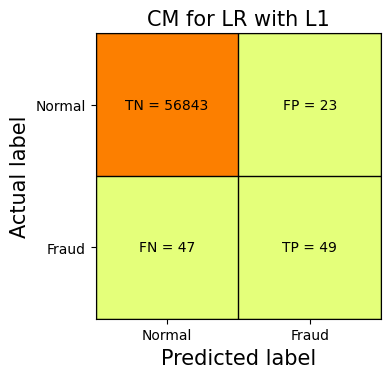

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.68      0.51      0.58        96

    accuracy                           1.00     56962
   macro avg       0.84      0.76      0.79     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy for L2: 0.9983146659176293
Confusion Matrix for L2:-


<Figure size 640x480 with 0 Axes>

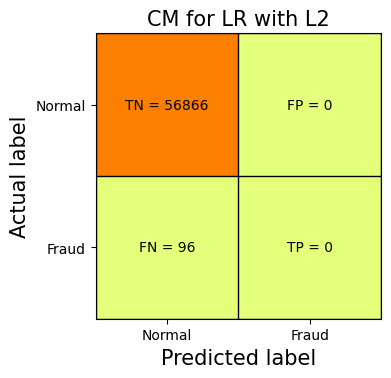

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.00      0.00      0.00        96

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962

L1 ROC AUC Score: 0.8483954237447098
Optimal Threshold (L1): 0.04858522536054555


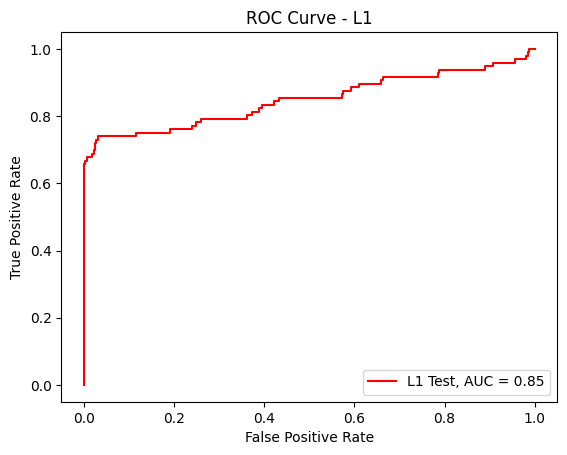

L2 ROC AUC Score: 0.5922988546172874
Optimal Threshold (L2): 0.49933293264573825


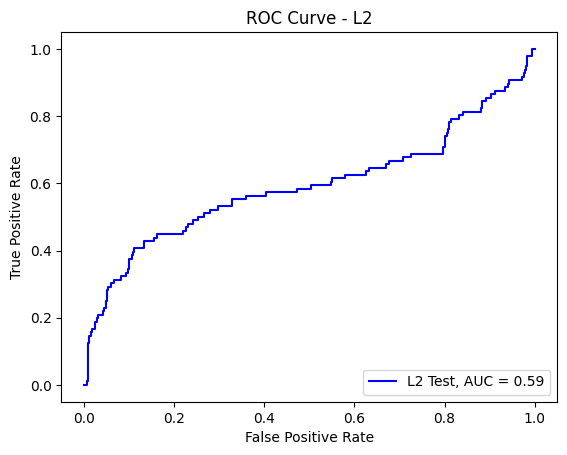

Time taken by model to run:-
--- 103.05316591262817 seconds ---
########################################################################################################################
KNN Model:-
KNN Model Score:-
0.9989466661985184
Confusion matrix for KNN:-


<Figure size 640x480 with 0 Axes>

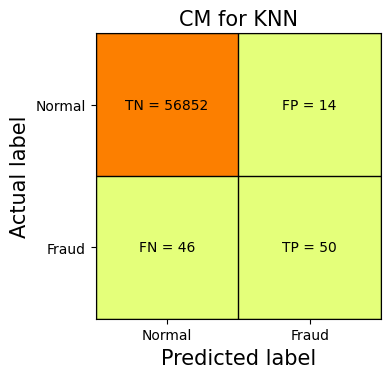

Classification Report for KNN:-
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.78      0.52      0.62        96

    accuracy                           1.00     56962
   macro avg       0.89      0.76      0.81     56962
weighted avg       1.00      1.00      1.00     56962

KNN ROC AUC Score: 0.8590672589948298
0.2


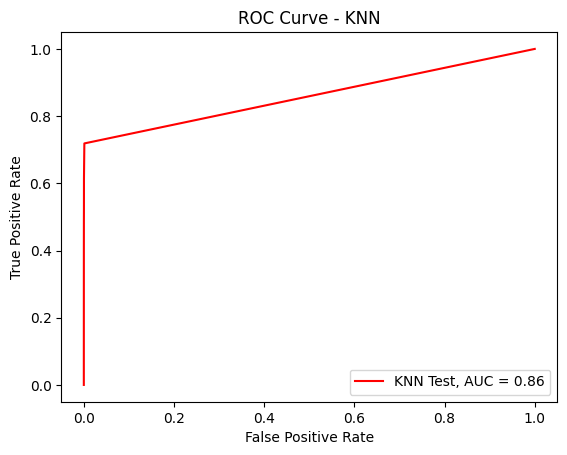

Time taken by model to run:-
--- 235.9999918937683 seconds ---
########################################################################################################################
Decision Tree Model:-
giniscore: 0.9988062216916541
Confusion matrix for Decision Tree:-


<Figure size 640x480 with 0 Axes>

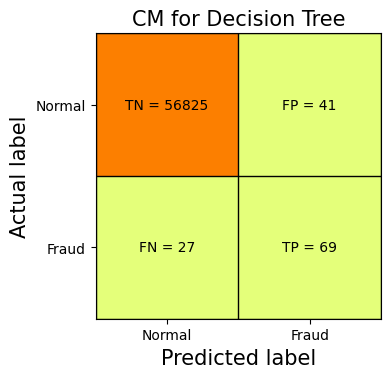

Classification Report for Decision Tree:-
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.63      0.72      0.67        96

    accuracy                           1.00     56962
   macro avg       0.81      0.86      0.83     56962
weighted avg       1.00      1.00      1.00     56962

1.0


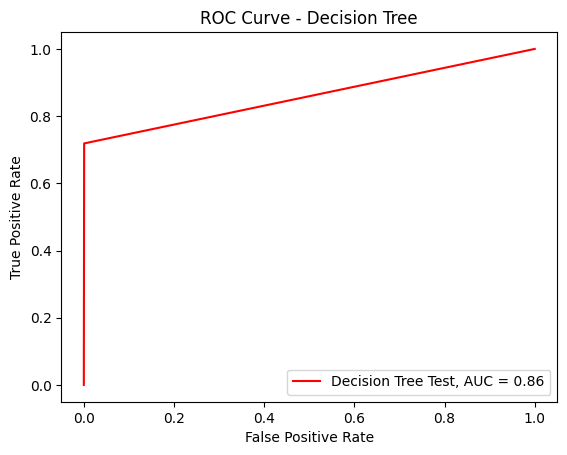

entropyscore: 0.9990519995786665
Confusion matrix for Decision Tree:-


<Figure size 640x480 with 0 Axes>

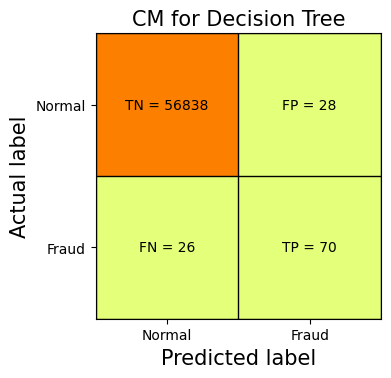

Classification Report for Decision Tree:-
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.71      0.73      0.72        96

    accuracy                           1.00     56962
   macro avg       0.86      0.86      0.86     56962
weighted avg       1.00      1.00      1.00     56962

1.0


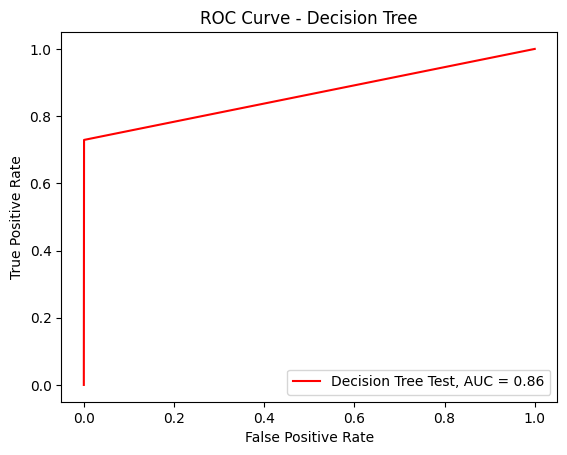

Time taken by model to run:-
--- 34.639485597610474 seconds ---
########################################################################################################################
Random Forest Model:-
Random Forest Model Score:-
0.9993504441557529
Confusion matrix for Random Forest:-


<Figure size 640x480 with 0 Axes>

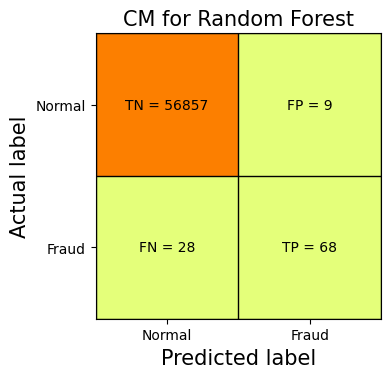

Classification Report for Random Forest:-
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.88      0.71      0.79        96

    accuracy                           1.00     56962
   macro avg       0.94      0.85      0.89     56962
weighted avg       1.00      1.00      1.00     56962

Random Forest ROC AUC Score: 0.9405628473077058
Optimal threshold for Random Forest: 0.01


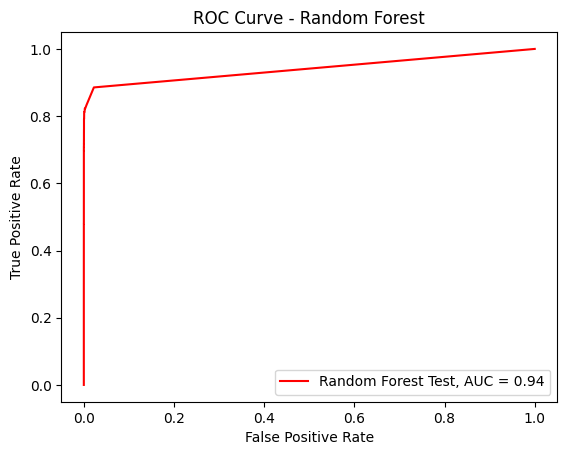

Time taken by model to run:-
--- 228.80526089668274 seconds ---
########################################################################################################################
XGBoost Model:-
XGBoost Model Score: 0.999385555282469
Confusion matrix for XGBoost:-


<Figure size 640x480 with 0 Axes>

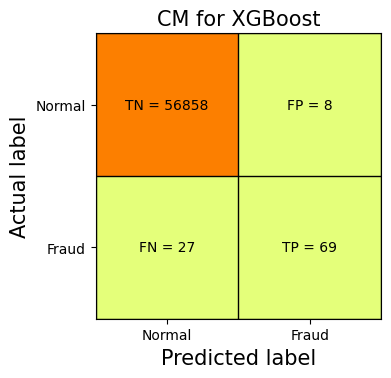

Classification Report for XGBoost:-
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.90      0.72      0.80        96

    accuracy                           1.00     56962
   macro avg       0.95      0.86      0.90     56962
weighted avg       1.00      1.00      1.00     56962

XGBoost ROC AUC Score: 0.9775861967901147
Optimal threshold for XGBoost: 2.300572e-05


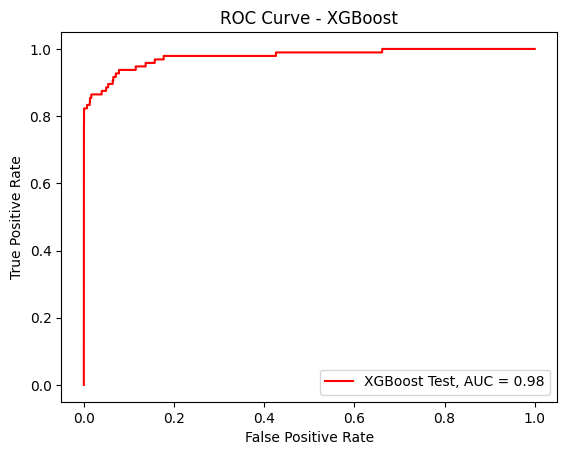

Time taken by model to run:-
--- 4.055206537246704 seconds ---
########################################################################################################################


'\n# Run SVM model\nprint("SVM Model:-")\nstart_time = time.time()\ndf_results = builtAndRunSVMModels(df_results, "Basic", x_train, y_train, x_test, y_test)\nprint("Time taken by model to run:-")\nprint("--- %s seconds ---" % (time.time() - start_time))\nprint("#"*120)\n'

In [ ]:
# Run Logistic Regression with L1 and L2 Regularisation
print("Logistic Regression with L1 and L2 Regularisation:-")
start_time = time.time()
df_results = builtAndRunLogisticRegressionModels(df_results, "Basic", x_train, y_train, x_test, y_test)
print("Time taken by model to run:-")
print("--- %s seconds ---" % (time.time() - start_time))
print("#"*120)

# Run KNN model
print("KNN Model:-")
start_time = time.time()
df_results = builtAndRunKNNModels(df_results, "Basic", x_train, y_train, x_test, y_test)
print("Time taken by model to run:-")
print("--- %s seconds ---" % (time.time() - start_time))
print("#"*120)

# Run Decision Tree Model with "gini" and "entropy"
print("Decision Tree Model:-")
start_time = time.time()
df_results = builtAndRunTreeModels(df_results, "Basic", x_train, y_train, x_test, y_test)
print("Time taken by model to run:-")
print("--- %s seconds ---" % (time.time() - start_time))
print("#"*120)


# Run Random Forest Model
print("Random Forest Model:-")
start_time = time.time()
df_results = builtAndRunRandomForestModels(df_results, "Basic", x_train, y_train, x_test, y_test)
print("Time taken by model to run:-")
print("--- %s seconds ---" % (time.time() - start_time))
print("#"*120)

# Run XGBoost model
print("XGBoost Model:-")
start_time = time.time()
df_results = builtAndRunXGBoostModels(df_results, "Basic", x_train, y_train, x_test, y_test)
print("Time taken by model to run:-")
print("--- %s seconds ---" % (time.time() - start_time))
print("#"*120)

"""
# Run SVM model
print("SVM Model:-")
start_time = time.time()
df_results = builtAndRunSVMModels(df_results, "Basic", x_train, y_train, x_test, y_test)
print("Time taken by model to run:-")
print("--- %s seconds ---" % (time.time() - start_time))
print("#"*120)
"""


# Cross validation with RepeatedKFold :

In [16]:
# Perform RepeatedKFold and check the results
from sklearn.model_selection import RepeatedKFold
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None)
# x is the feature set and y is the target
for train_index, test_index in rkf.split(x_train,y_train):
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train_rkf_cv, x_test_rkf_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_rkf_cv, y_test_rkf_cv = Y.iloc[train_index], Y.iloc[test_index]


TRAIN: [     0      1      2 ... 227841 227843 227844] TEST: [     3     13     25 ... 227835 227839 227842]
TRAIN: [     0      2      3 ... 227840 227842 227843] TEST: [     1      8      9 ... 227838 227841 227844]
TRAIN: [     0      1      2 ... 227841 227842 227844] TEST: [    12     14     16 ... 227831 227837 227843]
TRAIN: [     1      3      4 ... 227842 227843 227844] TEST: [     0      2      5 ... 227822 227824 227836]
TRAIN: [     0      1      2 ... 227842 227843 227844] TEST: [     4     17     23 ... 227832 227833 227840]
TRAIN: [     0      1      2 ... 227842 227843 227844] TEST: [     3      7      8 ... 227828 227832 227839]
TRAIN: [     0      1      2 ... 227842 227843 227844] TEST: [     5     11     12 ... 227816 227820 227825]
TRAIN: [     0      1      2 ... 227839 227840 227841] TEST: [     9     13     22 ... 227842 227843 227844]
TRAIN: [     3      4      5 ... 227842 227843 227844] TEST: [     0      1      2 ... 227836 227838 227841]
TRAIN: [     0     

In [ ]:
print(x_train_rkf_cv.shape)
print(x_test_rkf_cv.shape)
print(y_train_rkf_cv.shape)
print(y_test_rkf_cv.shape)

(182276, 30)
(45569, 30)
(182276,)
(45569,)


Logistic Regression with L1 and L2 Regularisation:-
Max AUC ROC for L1: 0.959979802267107
Max AUC ROC for L2: 0.5626877092693763
Parameters for L1 regularisation:
Coefficients: [[-0.03739984 -0.13286686 -0.209768    0.04594117 -0.24207574  0.08487322
   0.12565739 -0.04582901 -0.14446778 -0.14402437 -0.10766771  0.04704608
  -0.15794502 -0.25288119 -0.03205155 -0.10693764 -0.24665779  0.04813173
   0.02594528  0.20155269  0.09093268  0.00314447 -0.02658916 -0.0057957
  -0.13954757 -0.00984725 -0.05601295 -0.02195313 -0.00644477 -0.12968363]]
Intercept: [-2.04484107]
Parameters for L2 regularisation:
Coefficients: [[ 3.20100257e-07  1.66931556e-07 -1.32571284e-06 -1.84938315e-07
   3.03726765e-07 -2.14718717e-07  3.24277571e-08 -1.48088373e-08
  -6.91683896e-08 -1.29494240e-07 -3.76622889e-07  1.33623059e-07
  -1.09817942e-07 -3.77259634e-07 -3.22029803e-07 -6.74214062e-08
  -2.73018201e-07  8.00760645e-08  7.15273971e-08 -6.21869782e-08
   5.66357671e-08  1.41836450e-07  5.94770116e-08

<Figure size 640x480 with 0 Axes>

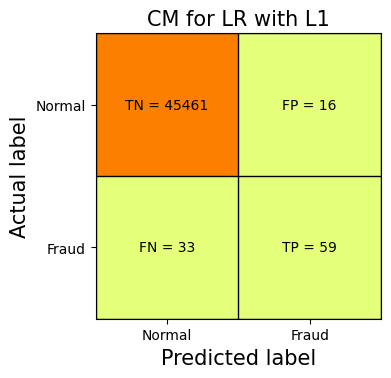

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45477
           1       0.79      0.64      0.71        92

    accuracy                           1.00     45569
   macro avg       0.89      0.82      0.85     45569
weighted avg       1.00      1.00      1.00     45569

Accuracy for L2: 0.9979810836314161
Confusion Matrix for L2:-


<Figure size 640x480 with 0 Axes>

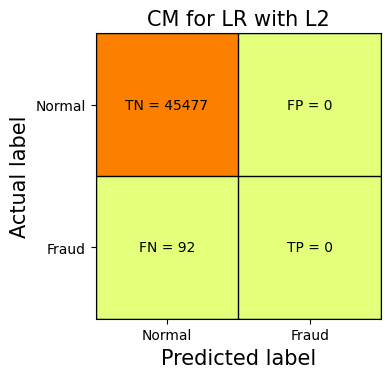

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45477
           1       0.00      0.00      0.00        92

    accuracy                           1.00     45569
   macro avg       0.50      0.50      0.50     45569
weighted avg       1.00      1.00      1.00     45569

L1 ROC AUC Score: 0.9163781787449174
Optimal Threshold (L1): 0.054305492202559175


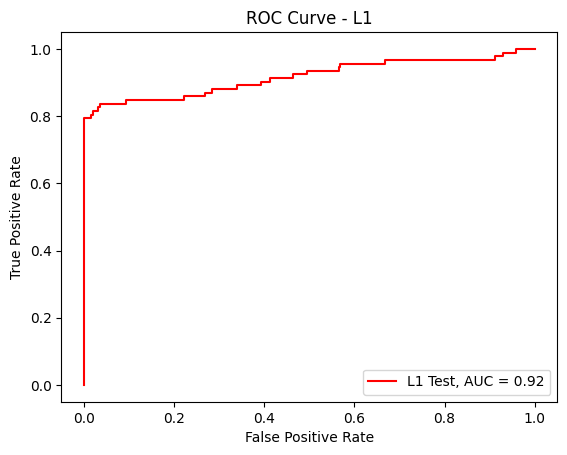

L2 ROC AUC Score: 0.5268219673394386
Optimal Threshold (L2): 0.49953345405464833


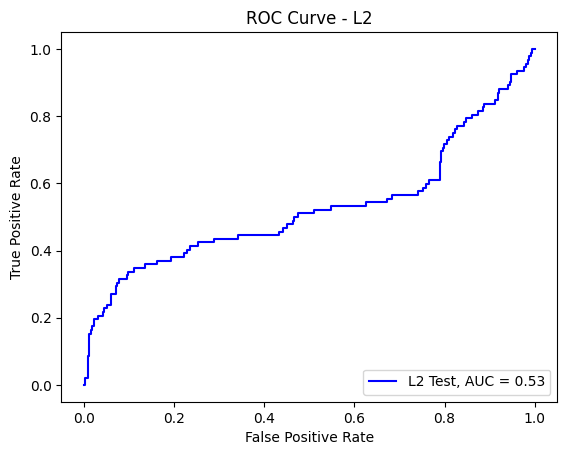

Time taken by model to run:-
--- 84.64885139465332 seconds ---
########################################################################################################################
KNN Model:-
KNN Model Score:-
0.999188044503939
Confusion matrix for KNN:-


<Figure size 640x480 with 0 Axes>

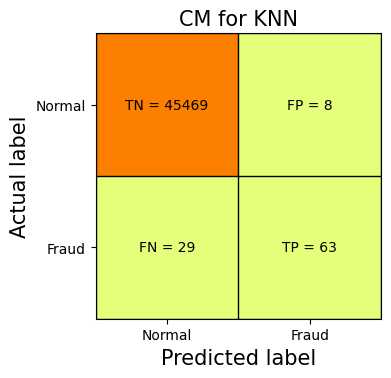

Classification Report for KNN:-
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45477
           1       0.89      0.68      0.77        92

    accuracy                           1.00     45569
   macro avg       0.94      0.84      0.89     45569
weighted avg       1.00      1.00      1.00     45569

KNN ROC AUC Score: 0.9237182484026804
0.2


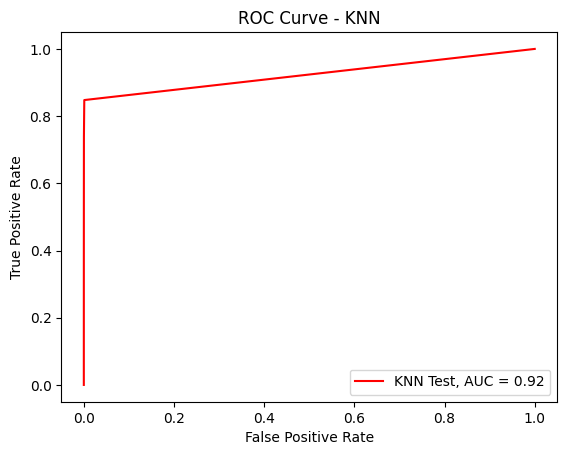

Time taken by model to run:-
--- 158.62143182754517 seconds ---
########################################################################################################################
Decision Tree Model:-
giniscore: 0.9990563760451184
Confusion matrix for Decision Tree:-


<Figure size 640x480 with 0 Axes>

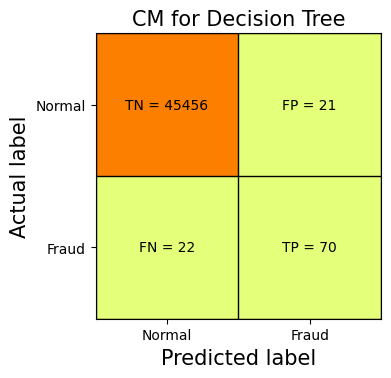

Classification Report for Decision Tree:-
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45477
           1       0.77      0.76      0.77        92

    accuracy                           1.00     45569
   macro avg       0.88      0.88      0.88     45569
weighted avg       1.00      1.00      1.00     45569

1.0


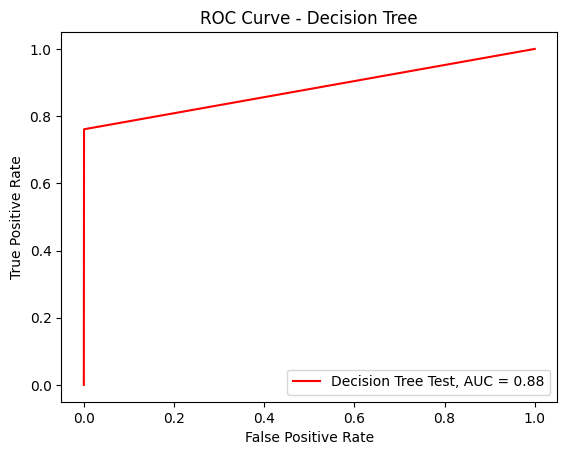

entropyscore: 0.9992099892470758
Confusion matrix for Decision Tree:-


<Figure size 640x480 with 0 Axes>

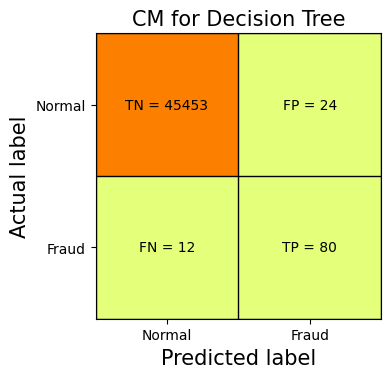

Classification Report for Decision Tree:-
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45477
           1       0.77      0.87      0.82        92

    accuracy                           1.00     45569
   macro avg       0.88      0.93      0.91     45569
weighted avg       1.00      1.00      1.00     45569

1.0


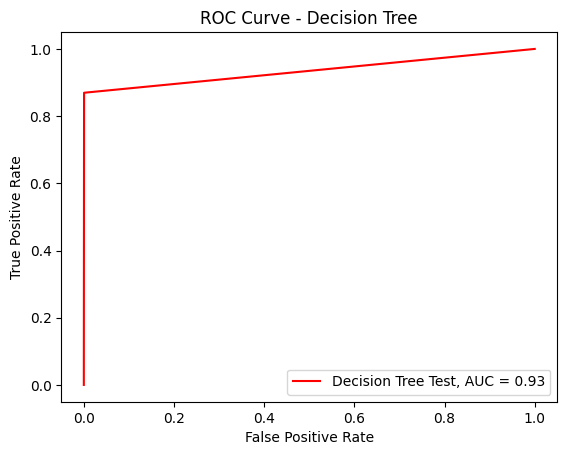

Time taken by model to run:-
--- 30.69588828086853 seconds ---
########################################################################################################################
Random Forest Model:-
Random Forest Model Score:-
0.9993636024490333
Confusion matrix for Random Forest:-


<Figure size 640x480 with 0 Axes>

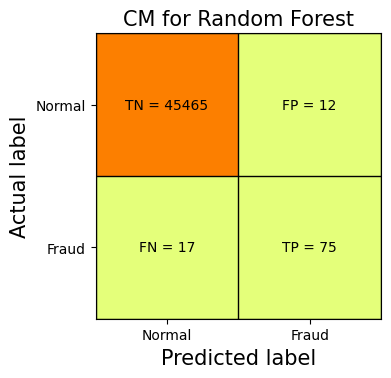

Classification Report for Random Forest:-
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45477
           1       0.86      0.82      0.84        92

    accuracy                           1.00     45569
   macro avg       0.93      0.91      0.92     45569
weighted avg       1.00      1.00      1.00     45569

Random Forest ROC AUC Score: 0.9607704228893534
Optimal threshold for Random Forest: 0.03


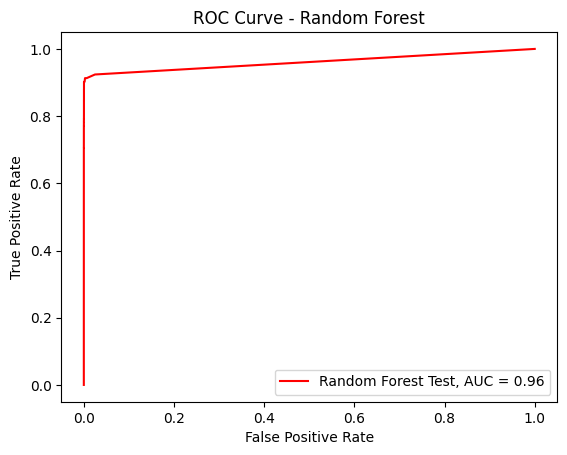

Time taken by model to run:-
--- 183.62981367111206 seconds ---
########################################################################################################################
XGBoost Model:-
XGBoost Model Score: 0.9995830498804011
Confusion matrix for XGBoost:-


<Figure size 640x480 with 0 Axes>

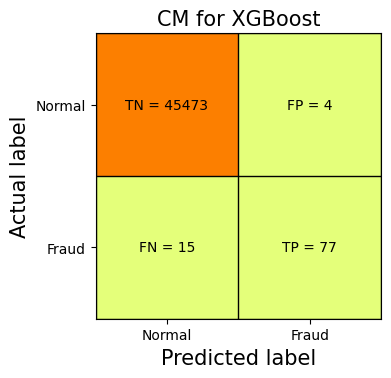

Classification Report for XGBoost:-
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45477
           1       0.95      0.84      0.89        92

    accuracy                           1.00     45569
   macro avg       0.98      0.92      0.94     45569
weighted avg       1.00      1.00      1.00     45569

XGBoost ROC AUC Score: 0.9810857566796785
Optimal threshold for XGBoost: 0.00012349358


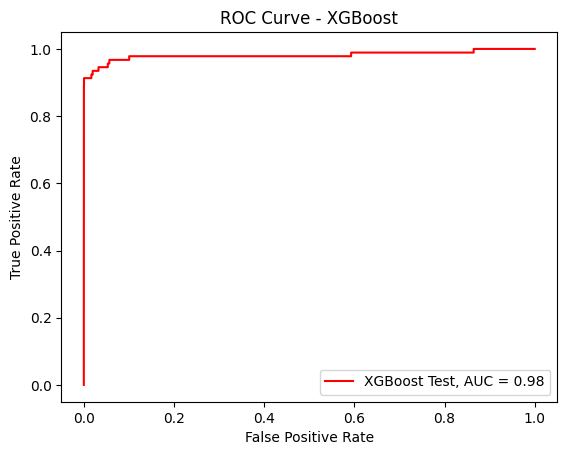

Time taken by model to run:-
--- 3.069974422454834 seconds ---
########################################################################################################################


'\n# Run SVM model\nprint("SVM Model:-")\nstart_time = time.time()\ndf_results = builtAndRunSVMModels(df_results, "RepeatedKFold Cross Validation", x_train_rkf_cv, y_train_rkf_cv, x_test_rkf_cv, y_test_rkf_cv)\nprint("Time taken by model to run:-")\nprint("--- %s seconds ---" % (time.time() - start_time))\nprint("#"*120)\n'

In [ ]:
# Run Logistic Regression with L1 and L2 Regularisation
print("Logistic Regression with L1 and L2 Regularisation:-")
start_time = time.time()
df_results = builtAndRunLogisticRegressionModels(df_results, "RepeatedKFold Cross Validation", x_train_rkf_cv, y_train_rkf_cv, x_test_rkf_cv, y_test_rkf_cv)
print("Time taken by model to run:-")
print("--- %s seconds ---" % (time.time() - start_time))
print("#"*120)

# Run KNN model
print("KNN Model:-")
start_time = time.time()
df_results = builtAndRunKNNModels(df_results, "RepeatedKFold Cross Validation", x_train_rkf_cv, y_train_rkf_cv, x_test_rkf_cv, y_test_rkf_cv)
print("Time taken by model to run:-")
print("--- %s seconds ---" % (time.time() - start_time))
print("#"*120)

# Run Decision Tree Model with "gini" and "entropy"
print("Decision Tree Model:-")
start_time = time.time()
df_results = builtAndRunTreeModels(df_results, "RepeatedKFold Cross Validation", x_train_rkf_cv, y_train_rkf_cv, x_test_rkf_cv, y_test_rkf_cv)
print("Time taken by model to run:-")
print("--- %s seconds ---" % (time.time() - start_time))
print("#"*120)


# Run Random Forest Model
print("Random Forest Model:-")
start_time = time.time()
df_results = builtAndRunRandomForestModels(df_results, "RepeatedKFold Cross Validation", x_train_rkf_cv, y_train_rkf_cv, x_test_rkf_cv, y_test_rkf_cv)
print("Time taken by model to run:-")
print("--- %s seconds ---" % (time.time() - start_time))
print("#"*120)

# Run XGBoost model
print("XGBoost Model:-")
start_time = time.time()
df_results = builtAndRunXGBoostModels(df_results, "RepeatedKFold Cross Validation", x_train_rkf_cv, y_train_rkf_cv, x_test_rkf_cv, y_test_rkf_cv)
print("Time taken by model to run:-")
print("--- %s seconds ---" % (time.time() - start_time))
print("#"*120)

"""
# Run SVM model
print("SVM Model:-")
start_time = time.time()
df_results = builtAndRunSVMModels(df_results, "RepeatedKFold Cross Validation", x_train_rkf_cv, y_train_rkf_cv, x_test_rkf_cv, y_test_rkf_cv)
print("Time taken by model to run:-")
print("--- %s seconds ---" % (time.time() - start_time))
print("#"*120)
"""


# Cross validation with StraitifiedKFolds :

In [ ]:
# Importing StraitifiedKFold
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=None)

for train_index, test_index in skf.split(x_train,y_train):
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train_skf_cv, x_test_skf_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_skf_cv, y_test_skf_cv = Y.iloc[train_index], Y.iloc[test_index]



TRAIN: [ 45561  45562  45563 ... 227842 227843 227844] TEST: [    0     1     2 ... 47790 48158 48725]
TRAIN: [     0      1      2 ... 227842 227843 227844] TEST: [45561 45562 45563 ... 91139 91140 91141]
TRAIN: [     0      1      2 ... 227842 227843 227844] TEST: [ 88916  89863  89948 ... 136716 136717 136718]
TRAIN: [     0      1      2 ... 227842 227843 227844] TEST: [132439 132443 132669 ... 182286 182287 182288]
TRAIN: [     0      1      2 ... 182286 182287 182288] TEST: [175453 175567 175673 ... 227842 227843 227844]


Logistic Regression with L1 and L2 Regularisation:-
Max AUC ROC for L1: 0.9596054122778263
Max AUC ROC for L2: 0.5632618778725456
Parameters for L1 regularisation:
Coefficients: [[-0.01193434 -0.18532307 -0.270632    0.02250736 -0.20886524  0.09195772
   0.1522611  -0.08229139 -0.14874234 -0.12106402 -0.18917841  0.11969699
  -0.18728708 -0.28986373 -0.12397803 -0.10786274 -0.2711734   0.07233708
   0.02848542  0.16106282  0.09083786  0.10221782 -0.13274607  0.0093028
  -0.40632097 -0.0360546  -0.16591343  0.10629235 -0.00659802 -0.13288049]]
Intercept: [-1.90418748]
Parameters for L2 regularisation:
Coefficients: [[ 7.48170364e-07 -3.11285893e-08 -2.88311581e-06 -4.94751888e-07
   8.52235009e-07 -3.79926801e-07  2.62545036e-07 -1.47527271e-07
  -1.67016536e-07 -3.77133766e-08 -9.41083971e-07  3.66677927e-07
  -3.39632696e-07 -6.22944060e-07 -7.12805881e-07 -9.31958615e-08
  -4.34158159e-07  2.19014348e-07  1.26174320e-07 -1.61340219e-07
   1.58387287e-07  4.34959133e-07  1.25440697e-0

<Figure size 640x480 with 0 Axes>

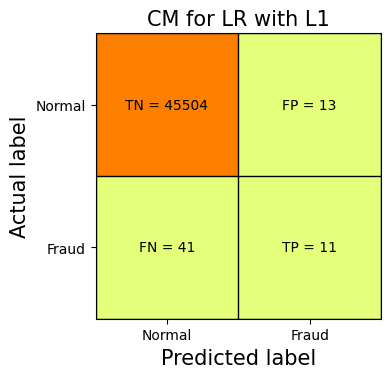

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45517
           1       0.46      0.21      0.29        52

    accuracy                           1.00     45569
   macro avg       0.73      0.61      0.64     45569
weighted avg       1.00      1.00      1.00     45569

Accuracy for L2: 0.9988588733568874
Confusion Matrix for L2:-


<Figure size 640x480 with 0 Axes>

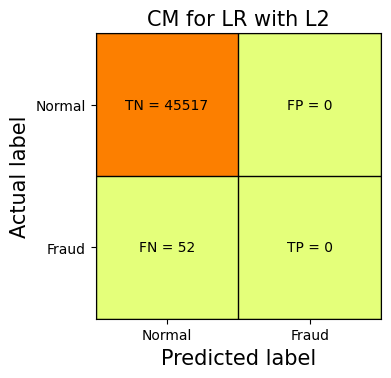

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45517
           1       0.00      0.00      0.00        52

    accuracy                           1.00     45569
   macro avg       0.50      0.50      0.50     45569
weighted avg       1.00      1.00      1.00     45569

L1 ROC AUC Score: 0.82615033098369
Optimal Threshold (L1): 0.054700083986141866


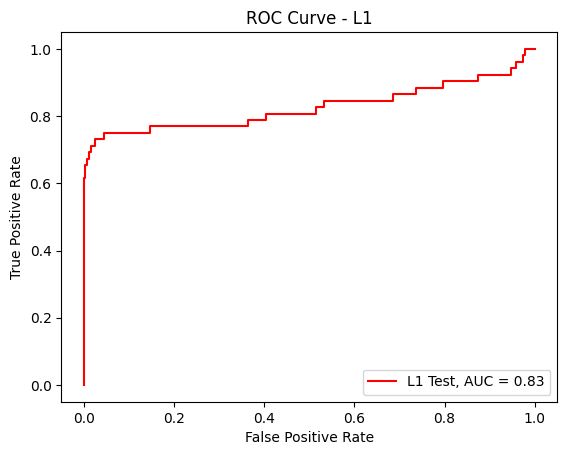

L2 ROC AUC Score: 0.5174921964912518
Optimal Threshold (L2): 0.499557505990131


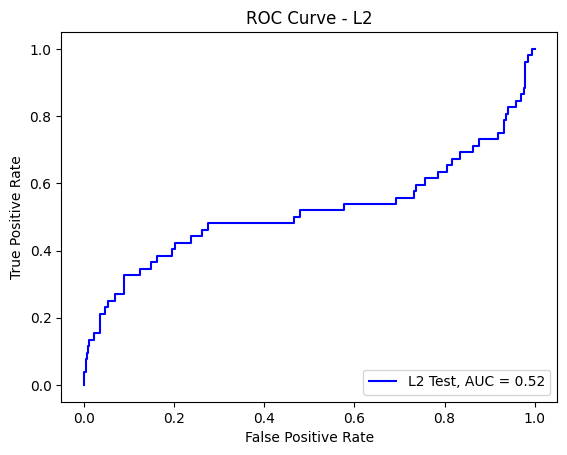

Time taken by model to run:-
--- 83.96374535560608 seconds ---
########################################################################################################################
KNN Model:-
KNN Model Score:-
0.9990344313019817
Confusion matrix for KNN:-


<Figure size 640x480 with 0 Axes>

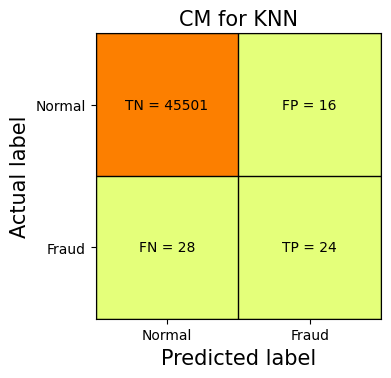

Classification Report for KNN:-
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45517
           1       0.60      0.46      0.52        52

    accuracy                           1.00     45569
   macro avg       0.80      0.73      0.76     45569
weighted avg       1.00      1.00      1.00     45569

KNN ROC AUC Score: 0.7977330109967367
0.2


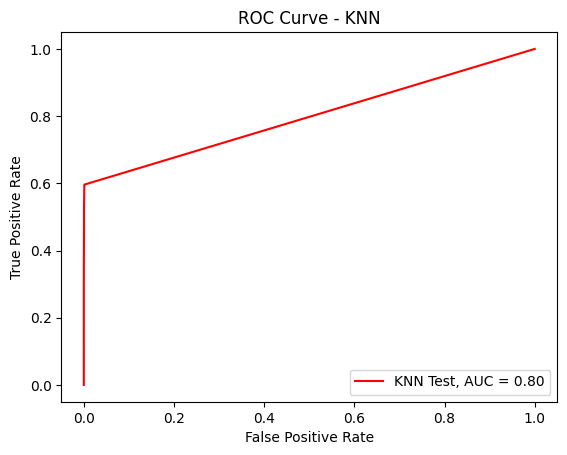

Time taken by model to run:-
--- 154.43875408172607 seconds ---
########################################################################################################################
Decision Tree Model:-
giniscore: 0.9989027628431609
Confusion matrix for Decision Tree:-


<Figure size 640x480 with 0 Axes>

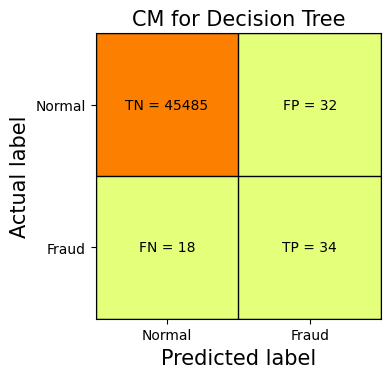

Classification Report for Decision Tree:-
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45517
           1       0.52      0.65      0.58        52

    accuracy                           1.00     45569
   macro avg       0.76      0.83      0.79     45569
weighted avg       1.00      1.00      1.00     45569

1.0


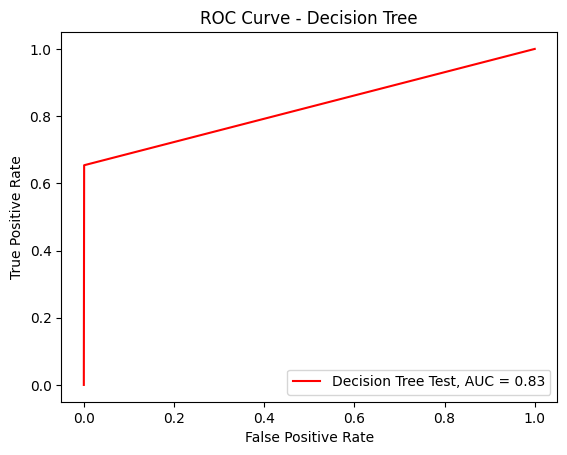

entropyscore: 0.9990344313019817
Confusion matrix for Decision Tree:-


<Figure size 640x480 with 0 Axes>

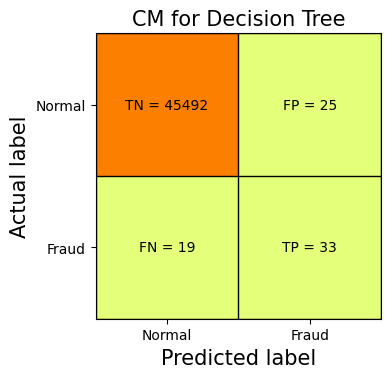

Classification Report for Decision Tree:-
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45517
           1       0.57      0.63      0.60        52

    accuracy                           1.00     45569
   macro avg       0.78      0.82      0.80     45569
weighted avg       1.00      1.00      1.00     45569

1.0


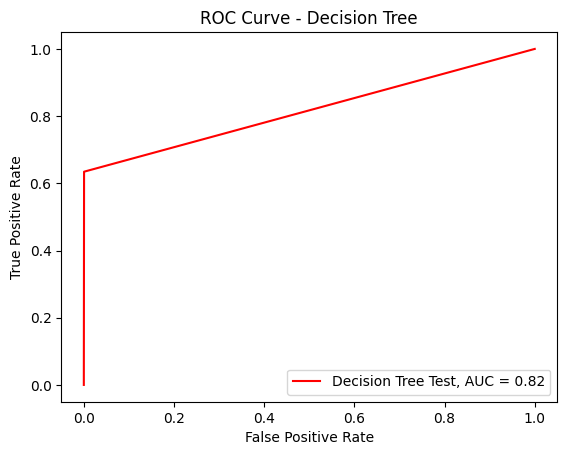

Time taken by model to run:-
--- 24.015167713165283 seconds ---
########################################################################################################################
Random Forest Model:-
Random Forest Model Score:-
0.9995391603941276
Confusion matrix for Random Forest:-


<Figure size 640x480 with 0 Axes>

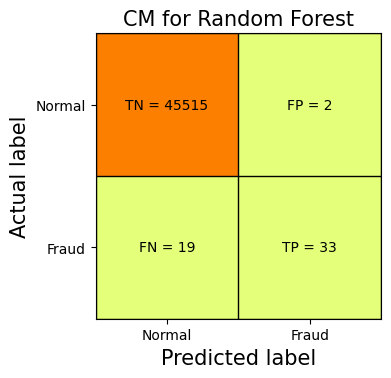

Classification Report for Random Forest:-
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45517
           1       0.94      0.63      0.76        52

    accuracy                           1.00     45569
   macro avg       0.97      0.82      0.88     45569
weighted avg       1.00      1.00      1.00     45569

Random Forest ROC AUC Score: 0.948289185274817
Optimal threshold for Random Forest: 0.01


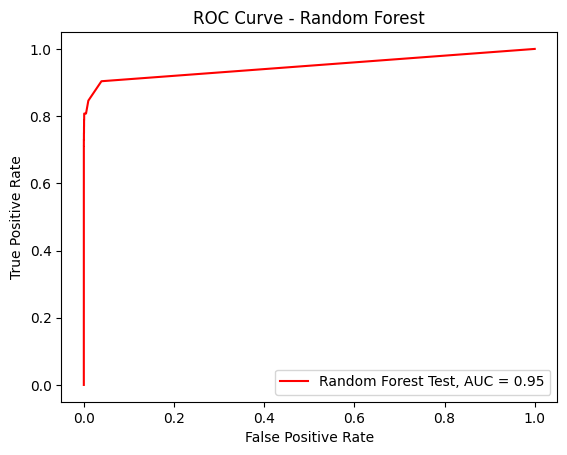

Time taken by model to run:-
--- 161.20268654823303 seconds ---
########################################################################################################################
XGBoost Model:-
XGBoost Model Score: 0.9995830498804011
Confusion matrix for XGBoost:-


<Figure size 640x480 with 0 Axes>

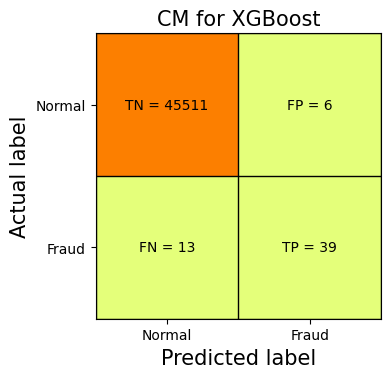

Classification Report for XGBoost:-
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45517
           1       0.87      0.75      0.80        52

    accuracy                           1.00     45569
   macro avg       0.93      0.87      0.90     45569
weighted avg       1.00      1.00      1.00     45569

XGBoost ROC AUC Score: 0.9808081004392273
Optimal threshold for XGBoost: 7.2298244e-05


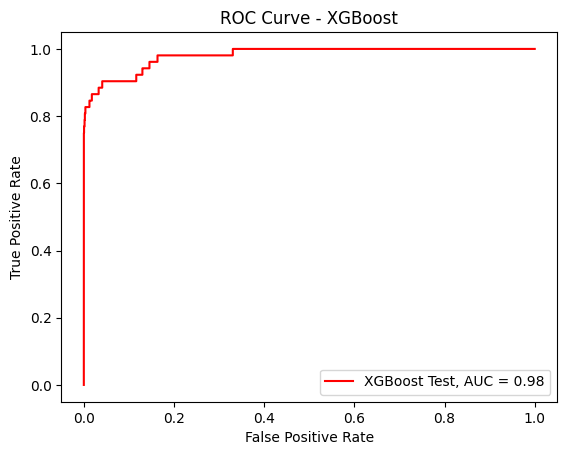

Time taken by model to run:-
--- 4.742305755615234 seconds ---
########################################################################################################################


'\n# Run SVM model\nprint("SVM Model:-")\nstart_time = time.time()\ndf_results = builtAndRunSVMModels(df_results, "StraitifiedKFold Cross validation", x_train_skf_cv, y_train_skf_cv, x_test_skf_cv, y_test_skf_cv)\nprint("Time taken by model to run:-")\nprint("--- %s seconds ---" % (time.time() - start_time))\nprint("#"*120)\n'

In [ ]:
# StraitifiedKFold Methodology
# Run Logistic Regression with L1 and L2 Regularisation
print("Logistic Regression with L1 and L2 Regularisation:-")
start_time = time.time()
df_results = builtAndRunLogisticRegressionModels(df_results, "StraitifiedKFold Cross validation", x_train_skf_cv, y_train_skf_cv, x_test_skf_cv, y_test_skf_cv)
print("Time taken by model to run:-")
print("--- %s seconds ---" % (time.time() - start_time))
print("#"*120)

# Run KNN model
print("KNN Model:-")
start_time = time.time()
df_results = builtAndRunKNNModels(df_results, "StraitifiedKFold Cross validation", x_train_skf_cv, y_train_skf_cv, x_test_skf_cv, y_test_skf_cv)
print("Time taken by model to run:-")
print("--- %s seconds ---" % (time.time() - start_time))
print("#"*120)

# Run Decision Tree Model with "gini" and "entropy"
print("Decision Tree Model:-")
start_time = time.time()
df_results = builtAndRunTreeModels(df_results, "StraitifiedKFold Cross validation", x_train_skf_cv, y_train_skf_cv, x_test_skf_cv, y_test_skf_cv)
print("Time taken by model to run:-")
print("--- %s seconds ---" % (time.time() - start_time))
print("#"*120)


# Run Random Forest Model
print("Random Forest Model:-")
start_time = time.time()
df_results = builtAndRunRandomForestModels(df_results, "StraitifiedKFold Cross validation", x_train_skf_cv, y_train_skf_cv, x_test_skf_cv, y_test_skf_cv)
print("Time taken by model to run:-")
print("--- %s seconds ---" % (time.time() - start_time))
print("#"*120)

# Run XGBoost model
print("XGBoost Model:-")
start_time = time.time()
df_results = builtAndRunXGBoostModels(df_results, "StraitifiedKFold Cross validation", x_train_skf_cv, y_train_skf_cv, x_test_skf_cv, y_test_skf_cv)
print("Time taken by model to run:-")
print("--- %s seconds ---" % (time.time() - start_time))
print("#"*120)

"""
# Run SVM model
print("SVM Model:-")
start_time = time.time()
df_results = builtAndRunSVMModels(df_results, "StraitifiedKFold Cross validation", x_train_skf_cv, y_train_skf_cv, x_test_skf_cv, y_test_skf_cv)
print("Time taken by model to run:-")
print("--- %s seconds ---" % (time.time() - start_time))
print("#"*120)
"""


# Model building with balanced classes :


> Reform class balancing with :

*   Random Oversampling
*   Smote
*   Adasyn
















# Oversampling with RandomOverSampler with StratifiedKFold Cross Validation :


> we will use Random Oversampler to generate data



In [ ]:
#Creating the dataset
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import RandomOverSampler

skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(x_train,y_train),1):
    X_train = X.loc[train_index]
    Y_train = Y.loc[train_index]
    X_test = X.loc[test_index]
    Y_test = Y.loc[test_index]
    ROS = RandomOverSampler(sampling_strategy=0.5)
    X_over, y_over = ROS.fit_resample(X_train, Y_train)

X_over =pd.DataFrame(data=X_over, columns=X.columns)


Logistic Regression with L1 and L2 Regularisation:-
Max AUC ROC for L1: 0.5
Max AUC ROC for L2: 0.5096959625148122
Parameters for L1 regularisation:
Coefficients: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]]
Intercept: [0.]
Parameters for L2 regularisation:
Coefficients: [[-1.71180923e-06  1.29375181e-06 -2.63285599e-06  1.39669307e-06
  -1.21450540e-06 -4.62209081e-07 -2.04344607e-06  2.11972644e-07
  -8.60845862e-07 -1.96288481e-06  1.19556764e-06 -2.11027717e-06
  -3.27985881e-08 -2.21504896e-06 -9.12299259e-08 -1.47427780e-06
  -2.46386070e-06 -8.37298361e-07  2.60611996e-07  1.07896545e-07
   2.51767927e-07  3.40918284e-08  4.82878985e-10 -2.60441290e-08
  -2.29750235e-08  4.70701883e-09  5.33001120e-08  1.28549726e-08
  -1.79397295e-05 -4.57343206e-06]]
Intercept: [-2.99315627e-07]
Accuracy for L1: 0.9988588733568874
Confusion Matrix for L1:-


<Figure size 640x480 with 0 Axes>

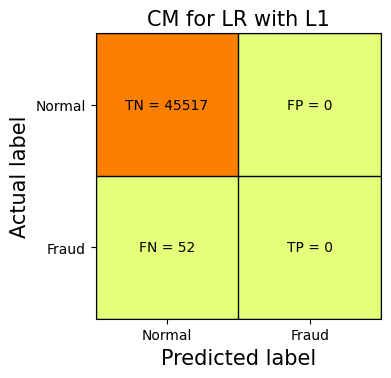

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45517
           1       0.00      0.00      0.00        52

    accuracy                           1.00     45569
   macro avg       0.50      0.50      0.50     45569
weighted avg       1.00      1.00      1.00     45569

Accuracy for L2: 0.998990541815708
Confusion Matrix for L2:-


<Figure size 640x480 with 0 Axes>

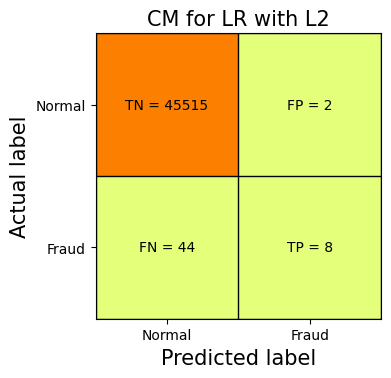

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45517
           1       0.80      0.15      0.26        52

    accuracy                           1.00     45569
   macro avg       0.90      0.58      0.63     45569
weighted avg       1.00      1.00      1.00     45569

L1 ROC AUC Score: 0.5
Optimal Threshold (L1): inf


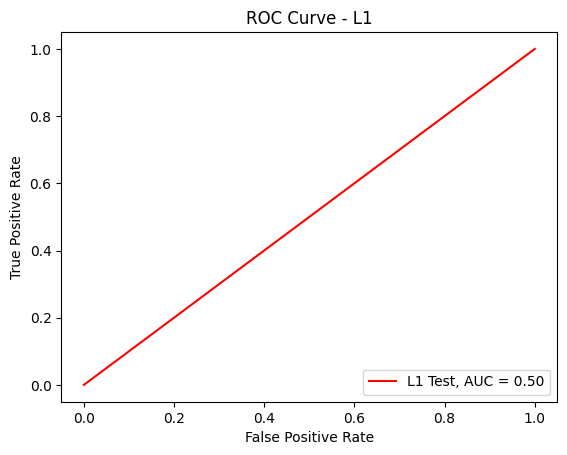

L2 ROC AUC Score: 0.5416911010425521
Optimal Threshold (L2): 0.4999812767394064


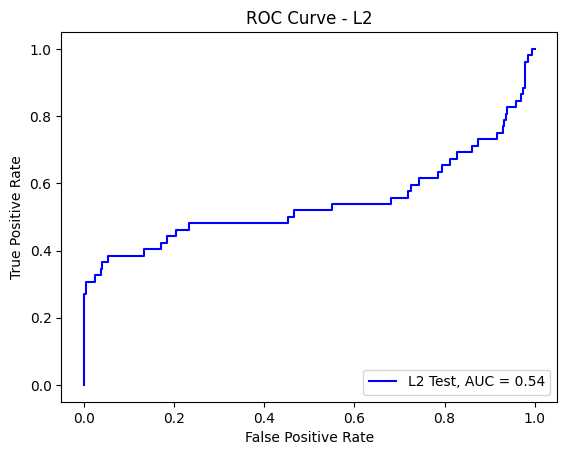

Time taken by model to run:-
--- 79.89020991325378 seconds ---
########################################################################################################################
KNN Model:-
KNN Model Score:-
0.9986613706686563
Confusion matrix for KNN:-


<Figure size 640x480 with 0 Axes>

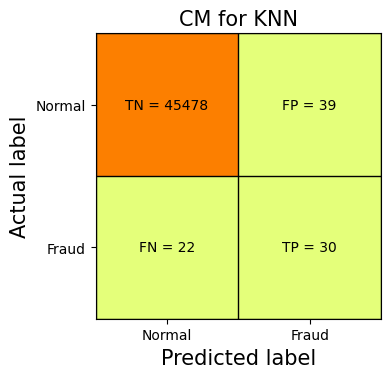

Classification Report for KNN:-
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45517
           1       0.43      0.58      0.50        52

    accuracy                           1.00     45569
   macro avg       0.72      0.79      0.75     45569
weighted avg       1.00      1.00      1.00     45569

KNN ROC AUC Score: 0.7976882263769581
0.4


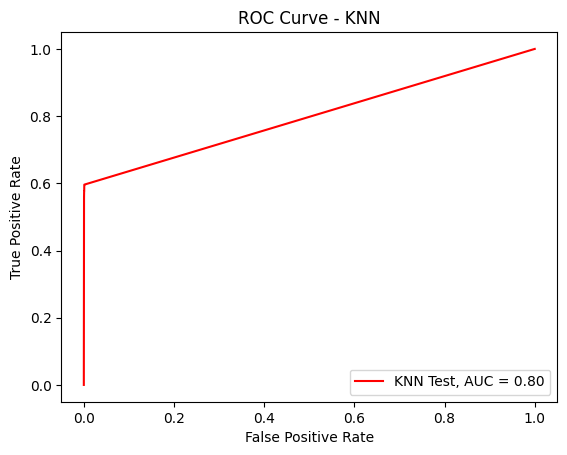

Time taken by model to run:-
--- 224.02714085578918 seconds ---
########################################################################################################################
Decision Tree Model:-
giniscore: 0.9992319339902126
Confusion matrix for Decision Tree:-


<Figure size 640x480 with 0 Axes>

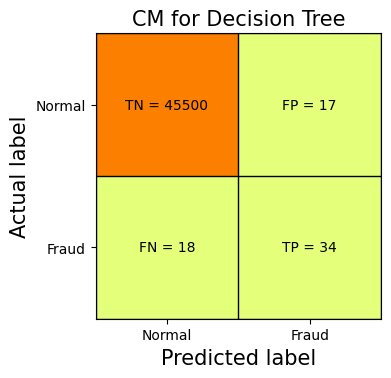

Classification Report for Decision Tree:-
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45517
           1       0.67      0.65      0.66        52

    accuracy                           1.00     45569
   macro avg       0.83      0.83      0.83     45569
weighted avg       1.00      1.00      1.00     45569

1.0


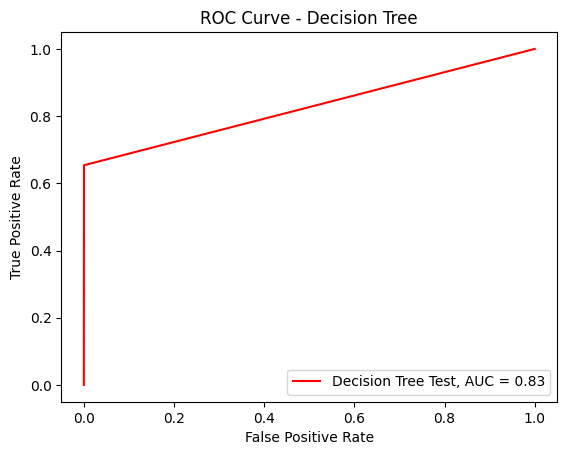

entropyscore: 0.9985955364392459
Confusion matrix for Decision Tree:-


<Figure size 640x480 with 0 Axes>

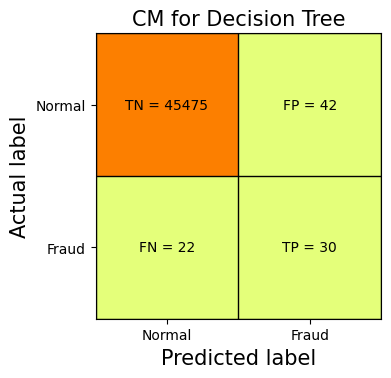

Classification Report for Decision Tree:-
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45517
           1       0.42      0.58      0.48        52

    accuracy                           1.00     45569
   macro avg       0.71      0.79      0.74     45569
weighted avg       1.00      1.00      1.00     45569

1.0


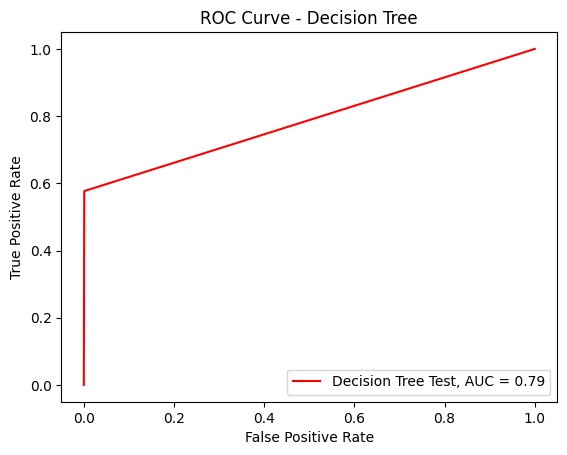

Time taken by model to run:-
--- 16.312925815582275 seconds ---
########################################################################################################################
Random Forest Model:-
Random Forest Model Score:-
0.9995830498804011
Confusion matrix for Random Forest:-


<Figure size 640x480 with 0 Axes>

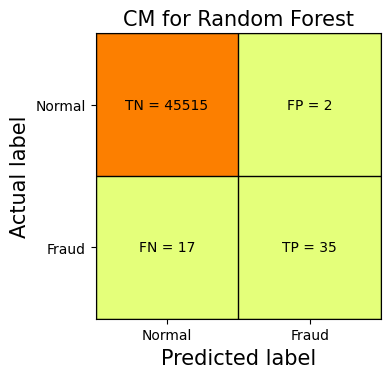

Classification Report for Random Forest:-
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45517
           1       0.95      0.67      0.79        52

    accuracy                           1.00     45569
   macro avg       0.97      0.84      0.89     45569
weighted avg       1.00      1.00      1.00     45569

Random Forest ROC AUC Score: 0.9372774500144494
Optimal threshold for Random Forest: 0.01


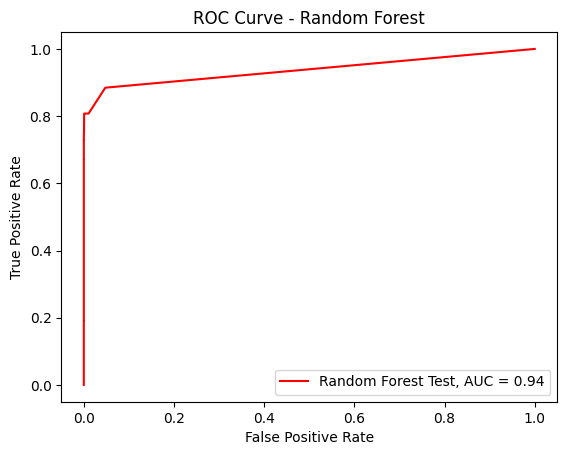

Time taken by model to run:-
--- 130.59392786026 seconds ---
########################################################################################################################
XGBoost Model:-
XGBoost Model Score: 0.9996269393666747
Confusion matrix for XGBoost:-


<Figure size 640x480 with 0 Axes>

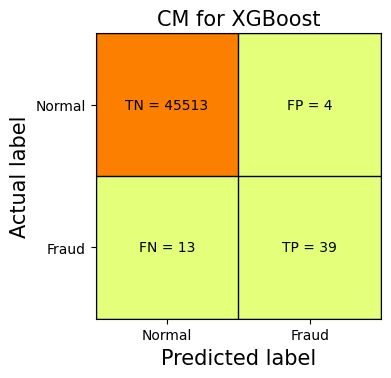

Classification Report for XGBoost:-
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45517
           1       0.91      0.75      0.82        52

    accuracy                           1.00     45569
   macro avg       0.95      0.87      0.91     45569
weighted avg       1.00      1.00      1.00     45569

XGBoost ROC AUC Score: 0.9771091443433645
Optimal threshold for XGBoost: 0.00029684583


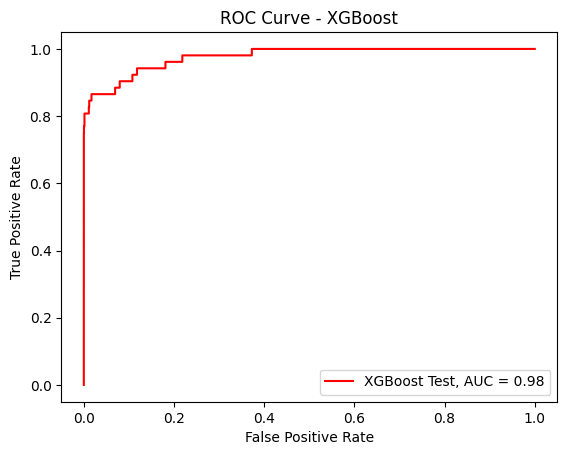

Time taken by model to run:-
--- 4.494987964630127 seconds ---
########################################################################################################################


'\n# Run SVM model\nprint("SVM Model:-")\nstart_time = time.time()\ndf_results = builtAndRunSVMModels(df_results, "StraitifiedKFold Oversampled RandomOversampler", X_over, y_over, X_test, Y_test)\nprint("Time taken by model to run:-")\nprint("--- %s seconds ---" % (time.time() - start_time))\nprint("#"*120)\n'

In [ ]:
# StraitifiedKFold Methodology, running over oversampled data:

# Run Logistic Regression with L1 and L2 Regularisation
print("Logistic Regression with L1 and L2 Regularisation:-")
start_time = time.time()
df_results = builtAndRunLogisticRegressionModels(df_results, "StraitifiedKFold Oversampled RandomOversampler", X_over, y_over, X_test, Y_test)
print("Time taken by model to run:-")
print("--- %s seconds ---" % (time.time() - start_time))
print("#"*120)

# Run KNN model
print("KNN Model:-")
start_time = time.time()
df_results = builtAndRunKNNModels(df_results, "StraitifiedKFold Oversampled RandomOversampler", X_over, y_over, X_test, Y_test)
print("Time taken by model to run:-")
print("--- %s seconds ---" % (time.time() - start_time))
print("#"*120)

# Run Decision Tree Model with "gini" and "entropy"
print("Decision Tree Model:-")
start_time = time.time()
df_results = builtAndRunTreeModels(df_results, "StraitifiedKFold Oversampled RandomOversampler", X_over, y_over, X_test, Y_test)
print("Time taken by model to run:-")
print("--- %s seconds ---" % (time.time() - start_time))
print("#"*120)


# Run Random Forest Model
print("Random Forest Model:-")
start_time = time.time()
df_results = builtAndRunRandomForestModels(df_results, "StraitifiedKFold Oversampled RandomOversampler", X_over, y_over, X_test, Y_test)
print("Time taken by model to run:-")
print("--- %s seconds ---" % (time.time() - start_time))
print("#"*120)

# Run XGBoost model
print("XGBoost Model:-")
start_time = time.time()
df_results = builtAndRunXGBoostModels(df_results, "StraitifiedKFold Oversampled RandomOversampler", X_over, y_over, X_test, Y_test)
print("Time taken by model to run:-")
print("--- %s seconds ---" % (time.time() - start_time))
print("#"*120)

"""
# Run SVM model
print("SVM Model:-")
start_time = time.time()
df_results = builtAndRunSVMModels(df_results, "StraitifiedKFold Oversampled RandomOversampler", X_over, y_over, X_test, Y_test)
print("Time taken by model to run:-")
print("--- %s seconds ---" % (time.time() - start_time))
print("#"*120)
"""


# Oversampling with smote :

In [ ]:
#Creating dataframe with smote and StratifiedKFold
from sklearn.model_selection import StratifiedKFold
from imblearn import over_sampling

skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(x_train,y_train),1):
    X_train = X.loc[train_index]
    Y_train = Y.loc[train_index]
    X_test = X.loc[test_index]
    Y_test = Y.loc[test_index]
    smote = over_sampling.SMOTE(random_state=0)
    X_smote, y_smote = smote.fit_resample(X_train, Y_train)

X_smote =pd.DataFrame(data=X_smote, columns=X.columns)

Logistic Regression with L1 and L2 Regularisation:-
Max AUC ROC for L1: 0.5
Max AUC ROC for L2: 0.5
Parameters for L1 regularisation:
Coefficients: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]]
Intercept: [0.]
Parameters for L2 regularisation:
Coefficients: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]]
Intercept: [0.]
Accuracy for L1: 0.9988588733568874
Confusion Matrix for L1:-


<Figure size 640x480 with 0 Axes>

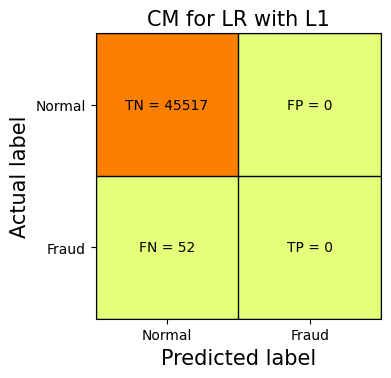

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45517
           1       0.00      0.00      0.00        52

    accuracy                           1.00     45569
   macro avg       0.50      0.50      0.50     45569
weighted avg       1.00      1.00      1.00     45569

Accuracy for L2: 0.9988588733568874
Confusion Matrix for L2:-


<Figure size 640x480 with 0 Axes>

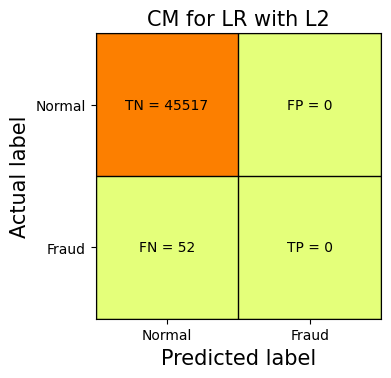

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45517
           1       0.00      0.00      0.00        52

    accuracy                           1.00     45569
   macro avg       0.50      0.50      0.50     45569
weighted avg       1.00      1.00      1.00     45569

L1 ROC AUC Score: 0.5
Optimal Threshold (L1): inf


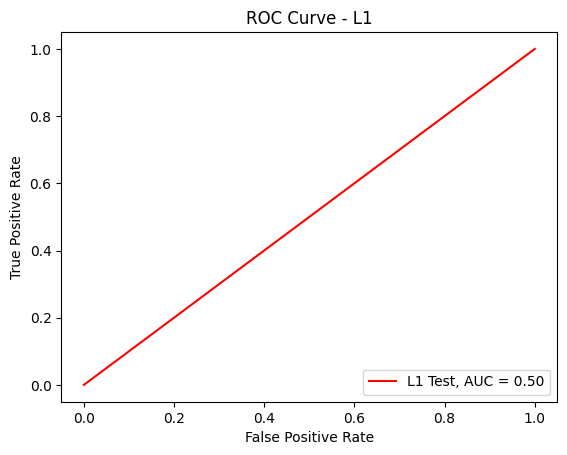

L2 ROC AUC Score: 0.5
Optimal Threshold (L2): inf


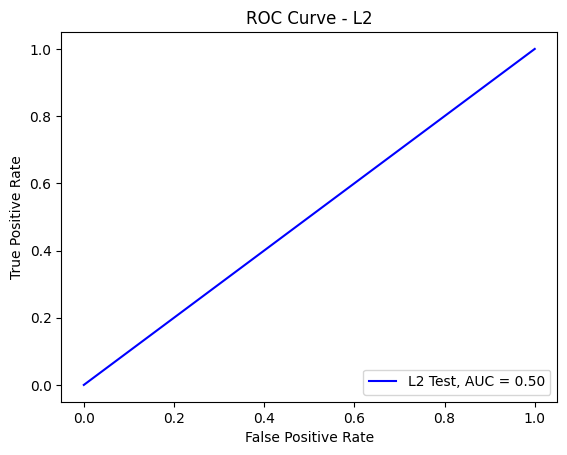

Time taken by model to run:-
--- 101.71353840827942 seconds ---
########################################################################################################################
KNN Model:-
KNN Model Score:-
0.9945138142158046
Confusion matrix for KNN:-


<Figure size 640x480 with 0 Axes>

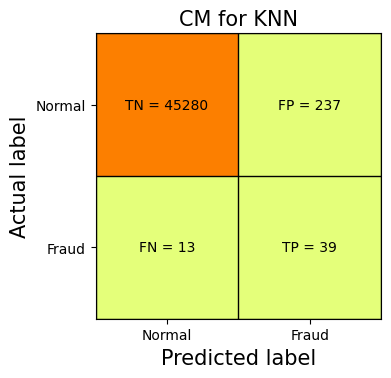

Classification Report for KNN:-
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     45517
           1       0.14      0.75      0.24        52

    accuracy                           0.99     45569
   macro avg       0.57      0.87      0.62     45569
weighted avg       1.00      0.99      1.00     45569

KNN ROC AUC Score: 0.8922285587295363
0.2


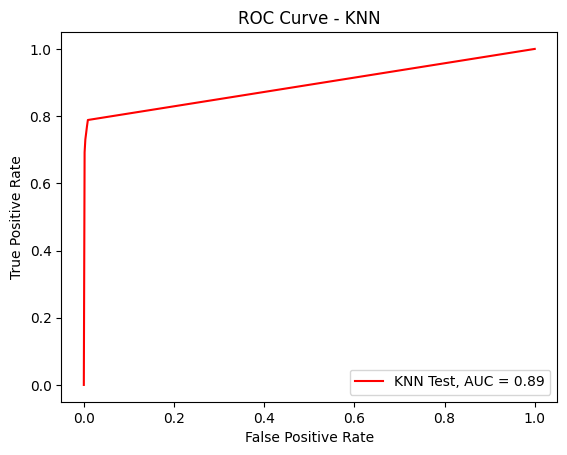

Time taken by model to run:-
--- 297.16928029060364 seconds ---
########################################################################################################################
Decision Tree Model:-
giniscore: 0.9927362900217253
Confusion matrix for Decision Tree:-


<Figure size 640x480 with 0 Axes>

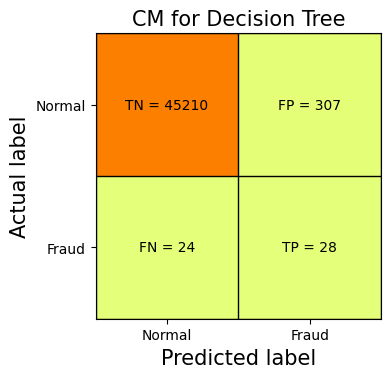

Classification Report for Decision Tree:-
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     45517
           1       0.08      0.54      0.14        52

    accuracy                           0.99     45569
   macro avg       0.54      0.77      0.57     45569
weighted avg       1.00      0.99      1.00     45569

1.0


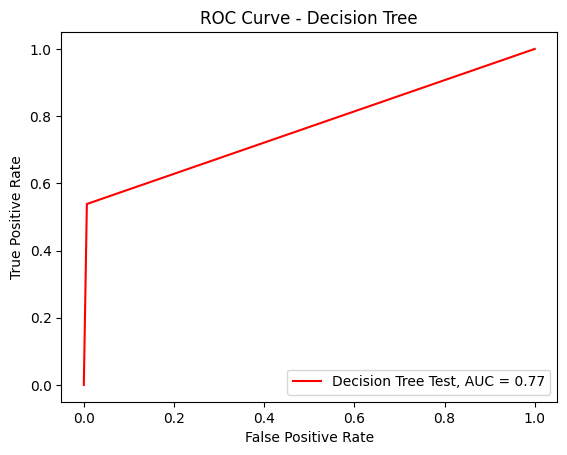

entropyscore: 0.9964449516118414
Confusion matrix for Decision Tree:-


<Figure size 640x480 with 0 Axes>

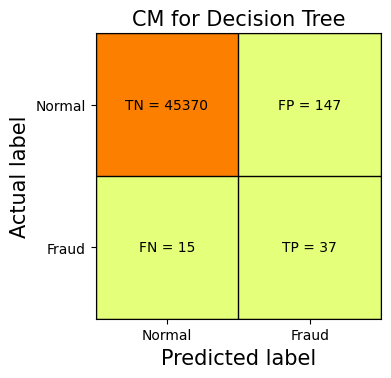

Classification Report for Decision Tree:-
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45517
           1       0.20      0.71      0.31        52

    accuracy                           1.00     45569
   macro avg       0.60      0.85      0.66     45569
weighted avg       1.00      1.00      1.00     45569

1.0


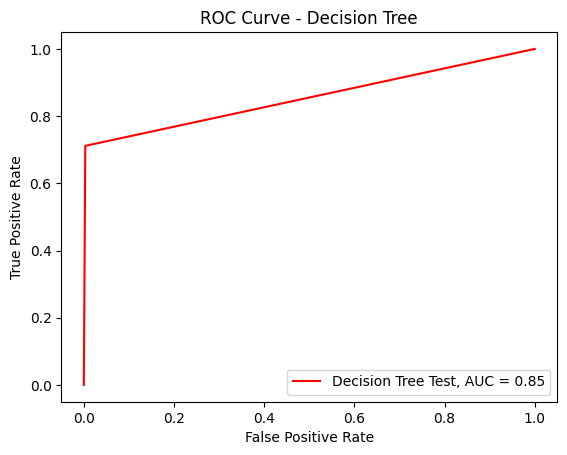

Time taken by model to run:-
--- 53.112229347229004 seconds ---
########################################################################################################################
Random Forest Model:-
Random Forest Model Score:-
0.9996269393666747
Confusion matrix for Random Forest:-


<Figure size 640x480 with 0 Axes>

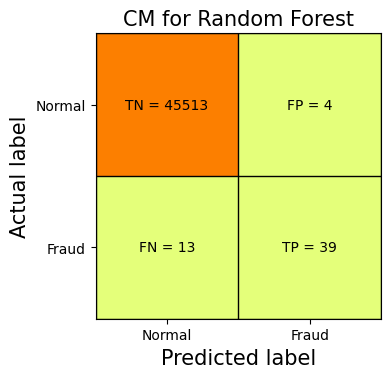

Classification Report for Random Forest:-
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45517
           1       0.91      0.75      0.82        52

    accuracy                           1.00     45569
   macro avg       0.95      0.87      0.91     45569
weighted avg       1.00      1.00      1.00     45569

Random Forest ROC AUC Score: 0.9738009974295319
Optimal threshold for Random Forest: 0.02


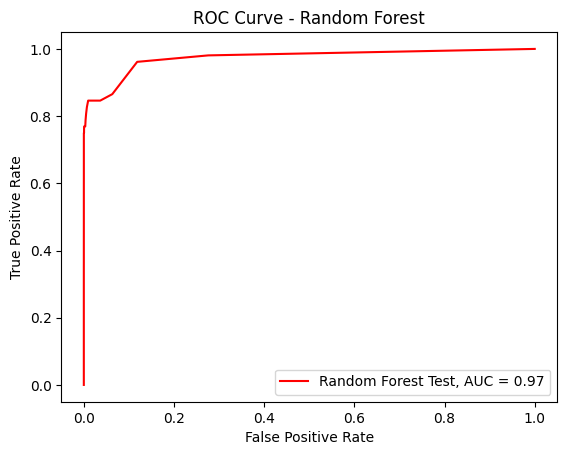

Time taken by model to run:-
--- 301.7139377593994 seconds ---
########################################################################################################################
XGBoost Model:-
XGBoost Model Score: 0.9992319339902126
Confusion matrix for XGBoost:-


<Figure size 640x480 with 0 Axes>

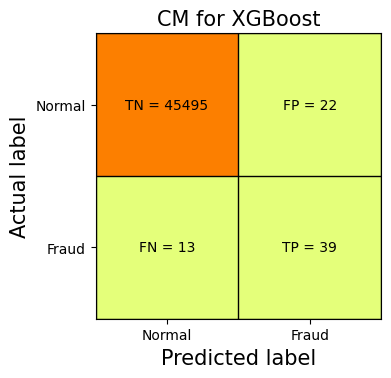

Classification Report for XGBoost:-
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45517
           1       0.64      0.75      0.69        52

    accuracy                           1.00     45569
   macro avg       0.82      0.87      0.84     45569
weighted avg       1.00      1.00      1.00     45569

XGBoost ROC AUC Score: 0.9741427970276532
Optimal threshold for XGBoost: 5.574212e-05


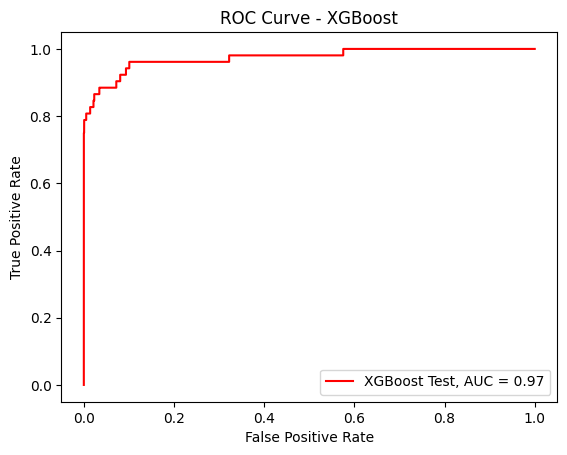

Time taken by model to run:-
--- 6.015848159790039 seconds ---
########################################################################################################################


'\n# Run SVM model\nprint("SVM Model:-")\nstart_time = time.time()\ndf_results = builtAndRunSVMModels(df_results, "StraitifiedKFold Oversampled SMOTE", X_smote, y_smote, X_test, Y_test)\nprint("Time taken by model to run:-")\nprint("--- %s seconds ---" % (time.time() - start_time))\nprint("#"*120)\n'

In [ ]:
# Running models over oversampled data with smote
# StraitifiedKFold Methodology

# Run Logistic Regression with L1 and L2 Regularisation
print("Logistic Regression with L1 and L2 Regularisation:-")
start_time = time.time()
df_results = builtAndRunLogisticRegressionModels(df_results, "StraitifiedKFold Oversampled SMOTE", X_smote, y_smote, X_test, Y_test)
print("Time taken by model to run:-")
print("--- %s seconds ---" % (time.time() - start_time))
print("#"*120)

# Run KNN model
print("KNN Model:-")
start_time = time.time()
df_results = builtAndRunKNNModels(df_results, "StraitifiedKFold Oversampled SMOTE", X_smote, y_smote, X_test, Y_test)
print("Time taken by model to run:-")
print("--- %s seconds ---" % (time.time() - start_time))
print("#"*120)

# Run Decision Tree Model with "gini" and "entropy"
print("Decision Tree Model:-")
start_time = time.time()
df_results = builtAndRunTreeModels(df_results, "StraitifiedKFold Oversampled SMOTE", X_smote, y_smote, X_test, Y_test)
print("Time taken by model to run:-")
print("--- %s seconds ---" % (time.time() - start_time))
print("#"*120)


# Run Random Forest Model
print("Random Forest Model:-")
start_time = time.time()
df_results = builtAndRunRandomForestModels(df_results, "StraitifiedKFold Oversampled SMOTE", X_smote, y_smote, X_test, Y_test)
print("Time taken by model to run:-")
print("--- %s seconds ---" % (time.time() - start_time))
print("#"*120)

# Run XGBoost model
print("XGBoost Model:-")
start_time = time.time()
df_results = builtAndRunXGBoostModels(df_results, "StraitifiedKFold Oversampled SMOTE", X_smote, y_smote, X_test, Y_test)
print("Time taken by model to run:-")
print("--- %s seconds ---" % (time.time() - start_time))
print("#"*120)

"""
# Run SVM model
print("SVM Model:-")
start_time = time.time()
df_results = builtAndRunSVMModels(df_results, "StraitifiedKFold Oversampled SMOTE", X_smote, y_smote, X_test, Y_test)
print("Time taken by model to run:-")
print("--- %s seconds ---" % (time.time() - start_time))
print("#"*120)
"""


# Oversampling with ADASYN:

In [ ]:
# Creating dataframe with ADASYN and StratifiedKFold
from sklearn.model_selection import StratifiedKFold
from imblearn import over_sampling

skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(x_train,y_train),1):
    X_train = X.loc[train_index]
    Y_train = Y.loc[train_index]
    X_test = X.loc[test_index]
    Y_test = Y.loc[test_index]
    adasyn = over_sampling.ADASYN(random_state=0)

    X_adasyn, y_adasyn = adasyn.fit_resample(X_train, Y_train)

X_adasyn =pd.DataFrame(data=X_adasyn, columns=X.columns)

Logistic Regression with L1 and L2 Regularisation:-
Max AUC ROC for L1: 0.5
Max AUC ROC for L2: 0.6091753778517757
Parameters for L1 regularisation:
Coefficients: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]]
Intercept: [0.]
Parameters for L2 regularisation:
Coefficients: [[-2.16628805e-05  1.70987558e-05 -3.81191920e-05  3.26721705e-05
  -1.61425085e-05 -8.46633563e-06 -2.43925268e-05  1.63639280e-06
  -1.37273278e-05 -3.83684907e-05  2.82099042e-05 -4.71283856e-05
  -2.11615909e-06 -5.49245065e-05  4.66200811e-07 -3.00224391e-05
  -4.68869258e-05 -1.42741908e-05  5.60459462e-06  8.95652102e-07
   6.19725495e-06  8.03197894e-07 -2.19351171e-06 -9.44021521e-07
  -1.04275170e-06 -2.73361746e-07  2.32659850e-06  4.75900152e-07
   1.23468844e-03 -2.59345536e-05]]
Intercept: [-8.38490768e-07]
Accuracy for L1: 0.9988588733568874
Confusion Matrix for L1:-


<Figure size 640x480 with 0 Axes>

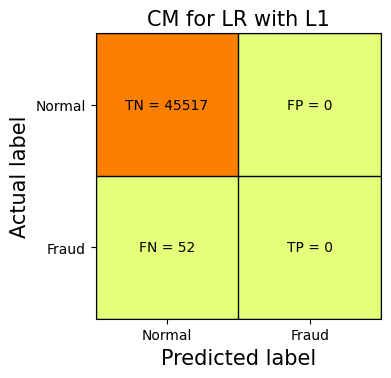

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45517
           1       0.00      0.00      0.00        52

    accuracy                           1.00     45569
   macro avg       0.50      0.50      0.50     45569
weighted avg       1.00      1.00      1.00     45569

Accuracy for L2: 0.011455155917399987
Confusion Matrix for L2:-


<Figure size 640x480 with 0 Axes>

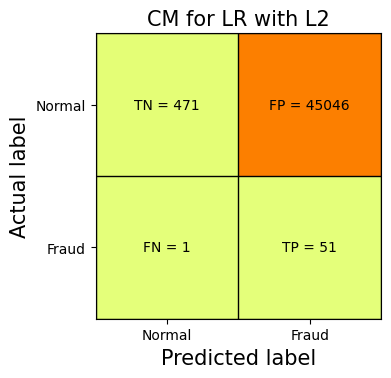

              precision    recall  f1-score   support

           0       1.00      0.01      0.02     45517
           1       0.00      0.98      0.00        52

    accuracy                           0.01     45569
   macro avg       0.50      0.50      0.01     45569
weighted avg       1.00      0.01      0.02     45569

L1 ROC AUC Score: 0.5
Optimal Threshold (L1): inf


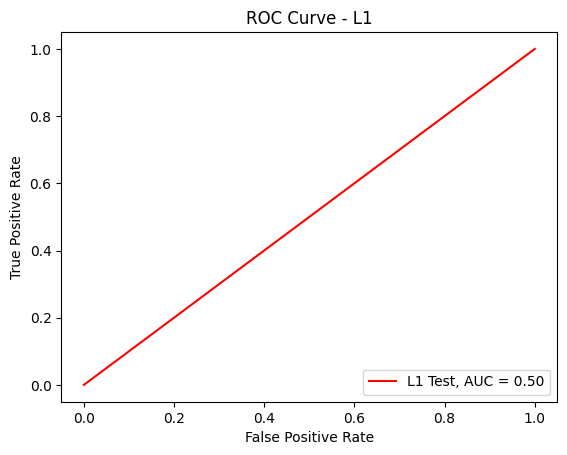

L2 ROC AUC Score: 0.5077388667970208
Optimal Threshold (L2): 0.5843830440521318


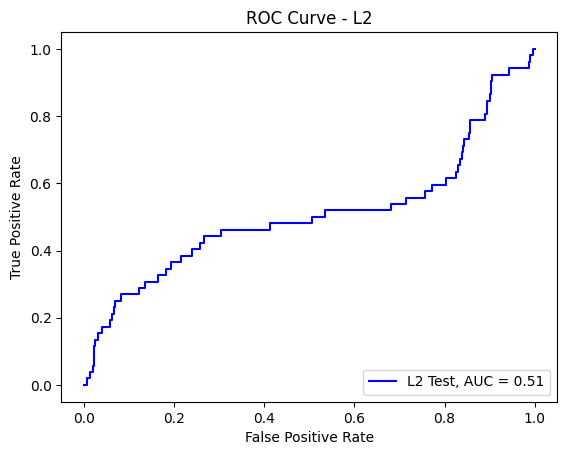

Time taken by model to run:-
--- 103.9763011932373 seconds ---
########################################################################################################################
KNN Model:-
KNN Model Score:-
0.9935482455177862
Confusion matrix for KNN:-


<Figure size 640x480 with 0 Axes>

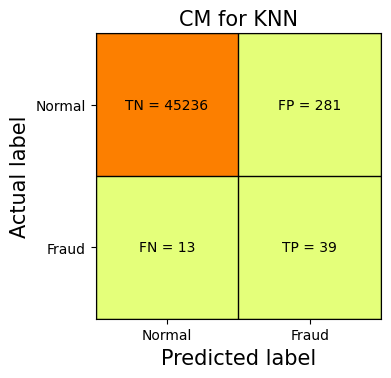

Classification Report for KNN:-
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     45517
           1       0.12      0.75      0.21        52

    accuracy                           0.99     45569
   macro avg       0.56      0.87      0.60     45569
weighted avg       1.00      0.99      1.00     45569

KNN ROC AUC Score: 0.8921058235215583
0.2


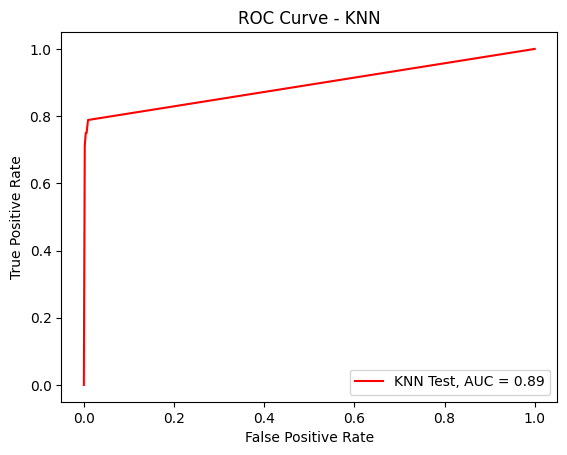

Time taken by model to run:-
--- 286.589723110199 seconds ---
########################################################################################################################
Decision Tree Model:-
giniscore: 0.9979591388882794
Confusion matrix for Decision Tree:-


<Figure size 640x480 with 0 Axes>

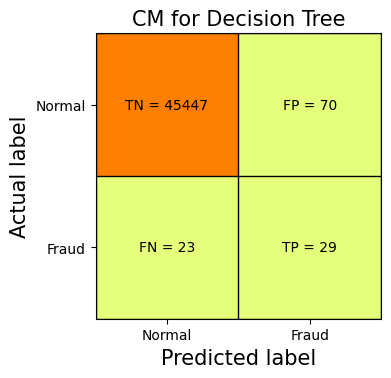

Classification Report for Decision Tree:-
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45517
           1       0.29      0.56      0.38        52

    accuracy                           1.00     45569
   macro avg       0.65      0.78      0.69     45569
weighted avg       1.00      1.00      1.00     45569

1.0


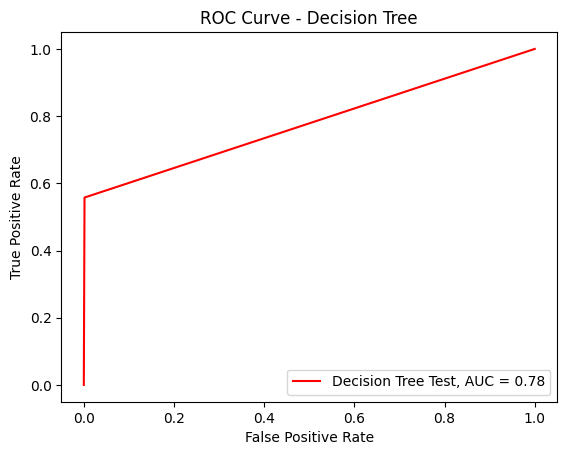

entropyscore: 0.9976299677412276
Confusion matrix for Decision Tree:-


<Figure size 640x480 with 0 Axes>

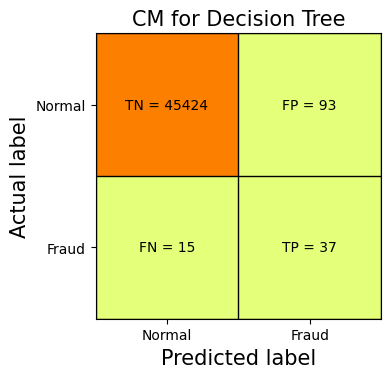

Classification Report for Decision Tree:-
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45517
           1       0.28      0.71      0.41        52

    accuracy                           1.00     45569
   macro avg       0.64      0.85      0.70     45569
weighted avg       1.00      1.00      1.00     45569

1.0


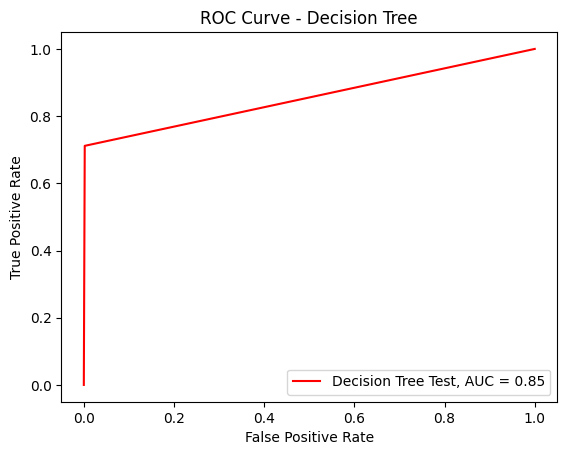

Time taken by model to run:-
--- 60.711262464523315 seconds ---
########################################################################################################################
Random Forest Model:-
Random Forest Model Score:-
0.9996049946235379
Confusion matrix for Random Forest:-


<Figure size 640x480 with 0 Axes>

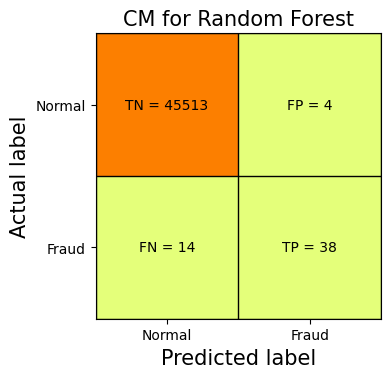

Classification Report for Random Forest:-
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45517
           1       0.90      0.73      0.81        52

    accuracy                           1.00     45569
   macro avg       0.95      0.87      0.90     45569
weighted avg       1.00      1.00      1.00     45569

Random Forest ROC AUC Score: 0.9558767983559819
Optimal threshold for Random Forest: 0.04


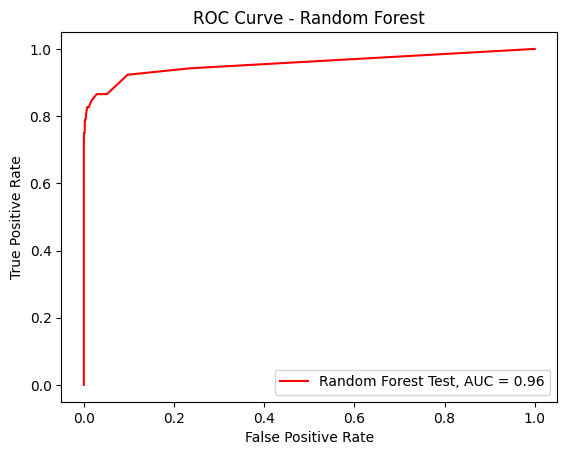

Time taken by model to run:-
--- 316.3200590610504 seconds ---
########################################################################################################################
XGBoost Model:-
XGBoost Model Score: 0.9993416577058966
Confusion matrix for XGBoost:-


<Figure size 640x480 with 0 Axes>

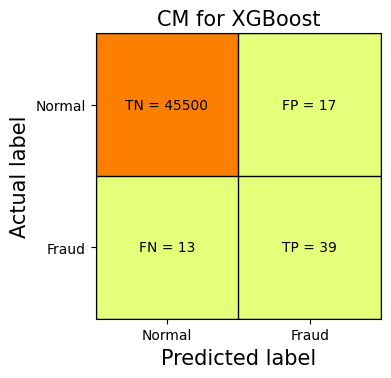

Classification Report for XGBoost:-
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45517
           1       0.70      0.75      0.72        52

    accuracy                           1.00     45569
   macro avg       0.85      0.87      0.86     45569
weighted avg       1.00      1.00      1.00     45569

XGBoost ROC AUC Score: 0.9653836013932242
Optimal threshold for XGBoost: 0.0004953773


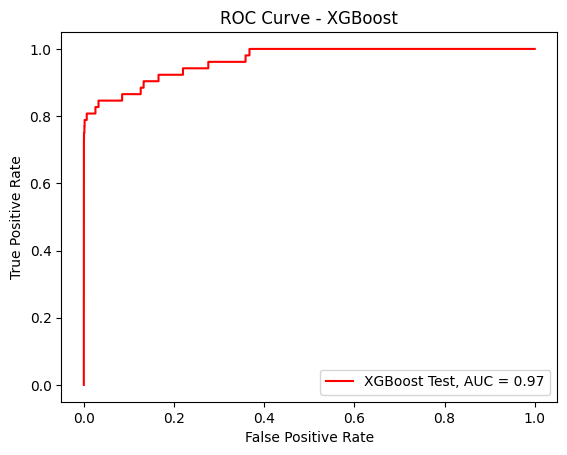

Time taken by model to run:-
--- 7.670727968215942 seconds ---
########################################################################################################################


'\n# Run SVM model\nprint("SVM Model:-")\nstart_time = time.time()\ndf_results = builtAndRunSVMModels(df_results, "StraitifiedKFold Oversampled ADASYN", X_adasyn, y_adasyn, X_test, Y_test)\nprint("Time taken by model to run:-")\nprint("--- %s seconds ---" % (time.time() - start_time))\nprint("#"*120)\n'

In [ ]:
# StraitifiedKFold Methodology, running over oversampled data with adasyn:

# Run Logistic Regression with L1 and L2 Regularisation
print("Logistic Regression with L1 and L2 Regularisation:-")
start_time = time.time()
df_results = builtAndRunLogisticRegressionModels(df_results, "StraitifiedKFold Oversampled ADASYN", X_adasyn, y_adasyn, X_test, Y_test)
print("Time taken by model to run:-")
print("--- %s seconds ---" % (time.time() - start_time))
print("#"*120)

# Run KNN model
print("KNN Model:-")
start_time = time.time()
df_results = builtAndRunKNNModels(df_results, "StraitifiedKFold Oversampled ADASYN", X_adasyn, y_adasyn, X_test, Y_test)
print("Time taken by model to run:-")
print("--- %s seconds ---" % (time.time() - start_time))
print("#"*120)

# Run Decision Tree Model with "gini" and "entropy"
print("Decision Tree Model:-")
start_time = time.time()
df_results = builtAndRunTreeModels(df_results, "StraitifiedKFold Oversampled ADASYN", X_adasyn, y_adasyn, X_test, Y_test)
print("Time taken by model to run:-")
print("--- %s seconds ---" % (time.time() - start_time))
print("#"*120)


# Run Random Forest Model
print("Random Forest Model:-")
start_time = time.time()
df_results = builtAndRunRandomForestModels(df_results, "StraitifiedKFold Oversampled ADASYN", X_adasyn, y_adasyn, X_test, Y_test)
print("Time taken by model to run:-")
print("--- %s seconds ---" % (time.time() - start_time))
print("#"*120)

# Run XGBoost model
print("XGBoost Model:-")
start_time = time.time()
df_results = builtAndRunXGBoostModels(df_results, "StraitifiedKFold Oversampled ADASYN", X_adasyn, y_adasyn, X_test, Y_test)
print("Time taken by model to run:-")
print("--- %s seconds ---" % (time.time() - start_time))
print("#"*120)

"""
# Run SVM model
print("SVM Model:-")
start_time = time.time()
df_results = builtAndRunSVMModels(df_results, "StraitifiedKFold Oversampled ADASYN", X_adasyn, y_adasyn, X_test, Y_test)
print("Time taken by model to run:-")
print("--- %s seconds ---" % (time.time() - start_time))
print("#"*120)
"""


In [ ]:
# Final results
df_results

,Methodology,Model,Accuracy,roc_values,threshold
0,StraitifiedKFold Oversampled ADASYN,XGBoost,0.999342,0.965384,0.000495
1,StraitifiedKFold Oversampled ADASYN,Random Forest,0.999605,0.955877,0.040000
2,StraitifiedKFold Oversampled ADASYN,Decision Tree,0.997630,0.854748,1.000000
3,StraitifiedKFold Oversampled ADASYN,Decision Tree,0.997959,0.778077,1.000000
4,StraitifiedKFold Oversampled ADASYN,KNN,0.993548,0.892106,0.200000
5,StraitifiedKFold Oversampled ADASYN,Logistic Regression with L2 regularisation,0.011455,0.507739,0.584383
6,StraitifiedKFold Oversampled ADASYN,Logistic Regression with L1 regularisation,0.998859,0.500000,inf
7,StraitifiedKFold Oversampled SMOTE,XGBoost,0.999232,0.974143,0.000056
8,StraitifiedKFold Oversampled SMOTE,Random Forest,0.999627,0.973801,0.020000
9,StraitifiedKFold Oversampled SMOTE,Decision Tree,0.996445,0.854154,1.000000


In [ ]:
max_roc_values3 = df_results.loc[df_results['roc_values'] == df_results['roc_values'].max()]
print("Row with max roc value")
print(max_roc_values3)

max_accuracy3 = df_results.loc[df_results['Accuracy'] == df_results['Accuracy'].max()]
print("\nRow with max accuracy")
print(max_accuracy3)

Row with max roc value
                       Methodology    Model  Accuracy  roc_values  threshold
28  RepeatedKFold Cross Validation  XGBoost  0.999583    0.981086   0.000123

Row with max accuracy
                                       Methodology          Model  Accuracy  \
8               StraitifiedKFold Oversampled SMOTE  Random Forest  0.999627   
14  StraitifiedKFold Oversampled RandomOversampler        XGBoost  0.999627   

    roc_values  threshold  
8     0.973801   0.020000  
14    0.977109   0.000297  


## Hyperparameter tuning :


> As we have seen the XGBoost model is performing best on the basis of roc_auc_values with RepeatedKFold cross validation.

So we will tune the hyperparameters for the same using GridSearchCV.



>Its taking too much time as it goes through all posible combinations of parameters.

GPU timeout is showing





In [ ]:
"""
# Hyperparameter tuning with GridSearchCV
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

param_test = {
    'max_depth': range(3,10,2),
    'min_child_weight': range(1,6,2),
    'gamma': [i/10.0 for i in range(0,5)],
    'subsample': [i/10.0 for i in range(6,10)],
    'colsample_bytree': [i/10.0 for i in range(6,10)],
    'n_estimators': range(60,130,150),
    'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.125, 0.175]
}

cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=42)

gsearch2 = GridSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree',colsample_bylevel=1,
                                                       colsample_bynode=1,max_delta_step=0,
                                                       missing=None, n_jobs=-1,
                                                       nthreads=None,objective='binary:logistic',random_state=42,
                                                       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
                                                       silent=None, verbosity=1),
                        param_grid= param_test,scoring='roc_auc',n_jobs=-1,cv=cv )
gsearch2.fit(x_train, y_train)
gsearch2.cv_results_, gsearch2.best_params_, gsearch2.best_score_

{
# the reason, why is it taking too much time:

max_depth (4) × min_child_weight (3) × gamma (5) × subsample (4) × colsample_bytree (4) × n_estimators (1) × learning_rate (6)
= 4×3×5×4×4×1×6 = **1,440 combinations**

And using RepeatedKFold with 50 folds (5×10) → 72,000 model fits!
}
"""

# Hyperparameter tuning by RandomizedSearchCV :

In [17]:

from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, RepeatedKFold

param_test = {
    'max_depth': range(3, 10, 2),
    'min_child_weight': range(1, 6, 2),
    'gamma': [i / 10.0 for i in range(0, 5)],
    'subsample': [i / 10.0 for i in range(6, 10)],
    'colsample_bytree': [i / 10.0 for i in range(6, 10)],
    'n_estimators': [60, 90, 120],
    'learning_rate': [0.05, 0.1, 0.15, 0.2]
}

cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=42)  # Keep it low to avoid timeouts

gsearch1 = RandomizedSearchCV(
    estimator=XGBClassifier(
        booster='gbtree',
        objective='binary:logistic',
        n_jobs=-1,
        random_state=42,
        verbosity=1
    ),
    param_distributions=param_test,
    scoring='roc_auc',
    n_iter=15,          # Number of random combinations to try
    n_jobs=-1,
    cv=cv,
    verbose=1,
    random_state=42
)

# Fit the model
gsearch1.fit(x_train_rkf_cv, y_train_rkf_cv)

# Best results
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_



# If we want best hyperparameters then we should go through all possible combinations.
# But we don't have enough time to do so as the GPU/CPU don't support that.


Fitting 10 folds for each of 15 candidates, totalling 150 fits


({'mean_fit_time': array([5.04063156, 5.14519217, 2.51025844, 3.05529728, 3.5836103 ,
         4.42216158, 3.43918979, 3.98516686, 4.61136532, 4.47356126,
         4.67887337, 4.12370942, 3.76300569, 3.70455577, 2.46512396]),
  'std_fit_time': array([0.86377348, 1.643776  , 0.44057033, 0.60929031, 0.59165745,
         0.8116851 , 0.73127981, 0.41075663, 0.71067268, 0.74551637,
         0.69470036, 0.66981257, 0.54190857, 0.48704015, 0.42728578]),
  'mean_score_time': array([0.14686246, 0.17516365, 0.07308111, 0.08186045, 0.11646945,
         0.15379622, 0.10579674, 0.12291038, 0.14264412, 0.13495252,
         0.15266979, 0.10439572, 0.13764756, 0.12418234, 0.07773166]),
  'std_score_time': array([0.03160186, 0.07340718, 0.01269015, 0.02083555, 0.02746341,
         0.04273629, 0.01900597, 0.03647548, 0.02879248, 0.0182944 ,
         0.02128256, 0.01208385, 0.03425697, 0.0450081 , 0.01103405]),
  'param_subsample': masked_array(data=[0.8, 0.6, 0.8, 0.9, 0.6, 0.8, 0.7, 0.8, 0.8, 0.8, 0.9,

In [ ]:
"""
# If we want best hyperparameters then we should go through all possible combinations.
# But we don't have enough time to do so as the GPU/CPU don't support that.
# So we are trying 2500 fits to find out best of them.
# To do so we will use batching so that gpu don't disconnect

import random
import joblib
from xgboost import XGBClassifier
from sklearn.model_selection import ParameterGrid, RandomizedSearchCV, RepeatedKFold

# Define full parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'subsample': [0.6, 0.7, 0.8, 0.9],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
    'n_estimators': [60, 90, 120],
    'learning_rate': [0.05, 0.1, 0.15, 0.2]
}

# Convert grid to full list of combinations, then shuffle
all_combinations = list(ParameterGrid(param_grid))
random.shuffle(all_combinations)

# Batch parameters
batch_size = 100
num_batches = len(all_combinations) // batch_size + int(len(all_combinations) % batch_size != 0)
all_results = []

# CV setup
cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=42)

# Run in batches
for i in range(num_batches):
    print(f"\n Running batch {i+1}/{num_batches}")

    # Sample batch
    batch_combinations = all_combinations[i * batch_size: (i + 1) * batch_size]

    # Convert list of dicts into a proper RandomizedSearch param_distributions
    sampled_params = random.sample(batch_combinations, min(50, len(batch_combinations)))

    search = RandomizedSearchCV(
        estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        param_distributions={k: list(set(d[k] for d in sampled_params)) for k in param_grid.keys()},
        n_iter=min(50, len(sampled_params)),
        scoring='roc_auc',
        n_jobs=-1,
        cv=cv,
        verbose=1,
        random_state=42
    )

    search.fit(x_train, y_train)

    # Save this batch result
    joblib.dump(search, f'/content/randomsearch_batch_{i+1}.pkl')
    all_results.append(search)

#  Get best result across all batches
best_model = max(all_results, key=lambda s: s.best_score_)
print("\nBest AUC across all batches:", best_model.best_score_)
print("Best hyperparameters:", best_model.best_params_)

# It is also taking too much time.

"""

In [18]:
# Final model
best_model = gsearch1.best_estimator_


In [19]:
# Predictions
y_pred = best_model.predict(x_test)
y_proba = best_model.predict_proba(x_test)[:, 1]


Accuracy: 0.9995435553526912

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.93      0.79      0.85        96

    accuracy                           1.00     56962
   macro avg       0.96      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962

ROC AUC Score: 0.99578413140834


<Figure size 640x480 with 0 Axes>

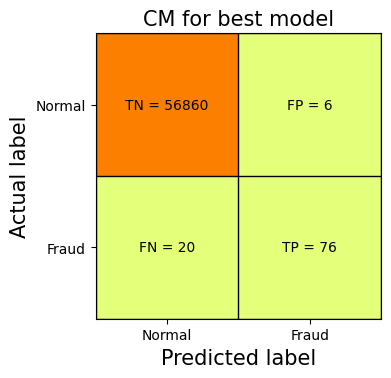

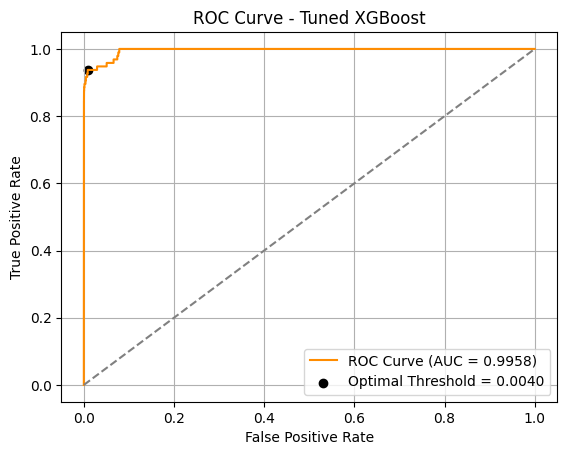

In [20]:
# Evaluation of the final model
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_proba)
print("ROC AUC Score:", roc_auc)

# Confusion Matrix
plot_confusion_matrix(y_test,y_pred,"CM for best model")


# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})", color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='black', label=f"Optimal Threshold = {optimal_threshold:.4f}")
plt.title("ROC Curve - Tuned XGBoost")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


In [21]:
import joblib
import os

# Define your path in Google Drive
save_dir = '/content/drive/MyDrive/My_models'
model_name = 'final_model_CCFD1.pkl'
os.makedirs(save_dir, exist_ok=True)

# Full path
full_path = os.path.join(save_dir, model_name)

# Save the model
joblib.dump(best_model, full_path)

print(f"Model saved to: {full_path}")


Model saved to: /content/drive/MyDrive/My_models/final_model_CCFD1.pkl
